# Capstone Project
<div style="text-align: right"> 
<b> Great Learning BDML Aug 2017 Capstone Project Group 3</b><br>
<b> Group Members:</b><br>
    Anupam Mondol<br>
    Manjeet Panda<br>
    Mario Vanhaltren<br>
    Prabhanshu Katiyar<br>
    Sandeep Vasistha<br>
<b> Group Mentor:</b><br>
    Sulekha Aloor Ravi<br>
</div>

Data: Supreme Court Database Code Book
brick_2017_01

Citations:<br>
Harold J. Spaeth, Lee Epstein, et al. 2017 Supreme Court Database, Version 2017 Release
1. URL: http://Supremecourtdatabase.org

Data:<br>
IDENTIFICATION VARIABLES
1. SCDB Case ID
2. SCDB Docket ID
3. SCDB Issues ID
4. SCDB Vote ID
5. U.S. Reporter Citation
6. Supreme Court Citation
7. Lawyers Edition Citation
8. LEXIS Citation
9. Docket Number
<br><br>
BACKGROUND VARIABLES
1. Case Name
2. Petitioner
3. Petitioner State
4. Respondent
5. Respondent State
6. Manner in which the Court takes Jurisdiction
7. Administrative Action Preceeding Litigation
8. Administrative Action Preceeding Litigation State
9. Three-Judge District Court
10. Origin of Case
11. Origin of Case State
12. Source of Case
13. Source of Case State
14. Lower Court Disagreement
15. Reason for Granting Cert
16. Lower Court Disposition
17. Lower Court Disposition Direction
<br><br>
CHRONOLOGICAL VARIABLES
1. Date of Decision
2. Term of Court
3. Natural Court
4. Chief Justice
5. Date of Oral Argument
6. Date of Reargument
<br><br>
SUBSTANTIVE VARIABLES
1. Issue
2. Issue Area
3. Decision Direction
4. Decision Direction Dissent
5. Authority for Decision 1
6. Authority for Decision 2
7. Legal Provisions Considered by the Court
8. Legal Provision Supplement
9. Legal Provision Minor Supplement
<br><br>
OUTCOME VARIABLES
1. Decision Type - decisionType                  
2. Declaration of Unconstitutionality - declarationUncon              
3. Disposition of Case - caseDisposition
4. Unusual Disposition - caseDispositionUnusual
5. Winning Party - partyWinning
6. Formal Alteration of Precedent - precedentAlteration
<br><br>
VOTING & OPINION VARIABLES
1. Vote Not Clearly Specified
2. Majority Opinion Writer
3. Majority Opinion Assigner
4. Split Vote
5. Majority Votes
6. Minority Votes
7. Justice ID
8. Justice Name
9. The Vote in the Case
10. Opinion
11. Direction of the Individual Justice's Votes
12. Majority and Minority Voting by Justice
13. First Agreement
14. Second Agreement

In [1]:
#Load libraries
# Load libraries
import numpy
import copy
import time
import re
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load dataset
filename = 'Data/SCDB_2017_01_justiceCentered_LegalProvision.csv'
raw_dataset = read_csv(filename,encoding='mac_roman',low_memory=False)

In [3]:
raw_dataset.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN


In [4]:
#Shape of data
rows,columns = raw_dataset.shape

In [5]:
print('Rows',rows)
print('Columns',columns)

Rows 118966
Columns 61


In [6]:
#COlumns
raw_dataset.columns

Index(['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
       'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term',
       'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument',
       'dateRearg', 'petitioner', 'petitionerState', 'respondent',
       'respondentState', 'jurisdiction', 'adminAction', 'adminActionState',
       'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource',
       'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'caseDisposition',
       'caseDispositionUnusual', 'partyWinning', 'precedentAlteration',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2',
       'lawType', 'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner',
       'splitVote', 'majVotes', 'minVotes', 'justice', 'justiceName', 'vote',
       'opinion', 'direction', 'majority', 'firstA

In [7]:
raw_dataset.dtypes

caseId                       object
docketId                     object
caseIssuesId                 object
voteId                       object
dateDecision                 object
decisionType                  int64
usCite                       object
sctCite                      object
ledCite                      object
lexisCite                    object
term                          int64
naturalCourt                  int64
chief                        object
docket                       object
caseName                     object
dateArgument                 object
dateRearg                    object
petitioner                  float64
petitionerState             float64
respondent                  float64
respondentState             float64
jurisdiction                  int64
adminAction                 float64
adminActionState            float64
threeJudgeFdc               float64
caseOrigin                  float64
caseOriginState             float64
caseSource                  

In [8]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118966 entries, 0 to 118965
Data columns (total 61 columns):
caseId                      118966 non-null object
docketId                    118966 non-null object
caseIssuesId                118966 non-null object
voteId                      118966 non-null object
dateDecision                118966 non-null object
decisionType                118966 non-null int64
usCite                      114324 non-null object
sctCite                     118373 non-null object
ledCite                     118740 non-null object
lexisCite                   118966 non-null object
term                        118966 non-null int64
naturalCourt                118966 non-null int64
chief                       118966 non-null object
docket                      118678 non-null object
caseName                    118966 non-null object
dateArgument                107450 non-null object
dateRearg                   3305 non-null object
petitioner                 

In [9]:
raw_dataset.isnull().sum()

caseId                           0
docketId                         0
caseIssuesId                     0
voteId                           0
dateDecision                     0
decisionType                     0
usCite                        4642
sctCite                        593
ledCite                        226
lexisCite                        0
term                             0
naturalCourt                     0
chief                            0
docket                         288
caseName                         0
dateArgument                 11516
dateRearg                   115661
petitioner                      18
petitionerState              95580
respondent                      72
respondentState              86397
jurisdiction                     0
adminAction                  82073
adminActionState            109340
threeJudgeFdc                    9
caseOrigin                    4069
caseOriginState              86397
caseSource                    2494
caseSourceState     

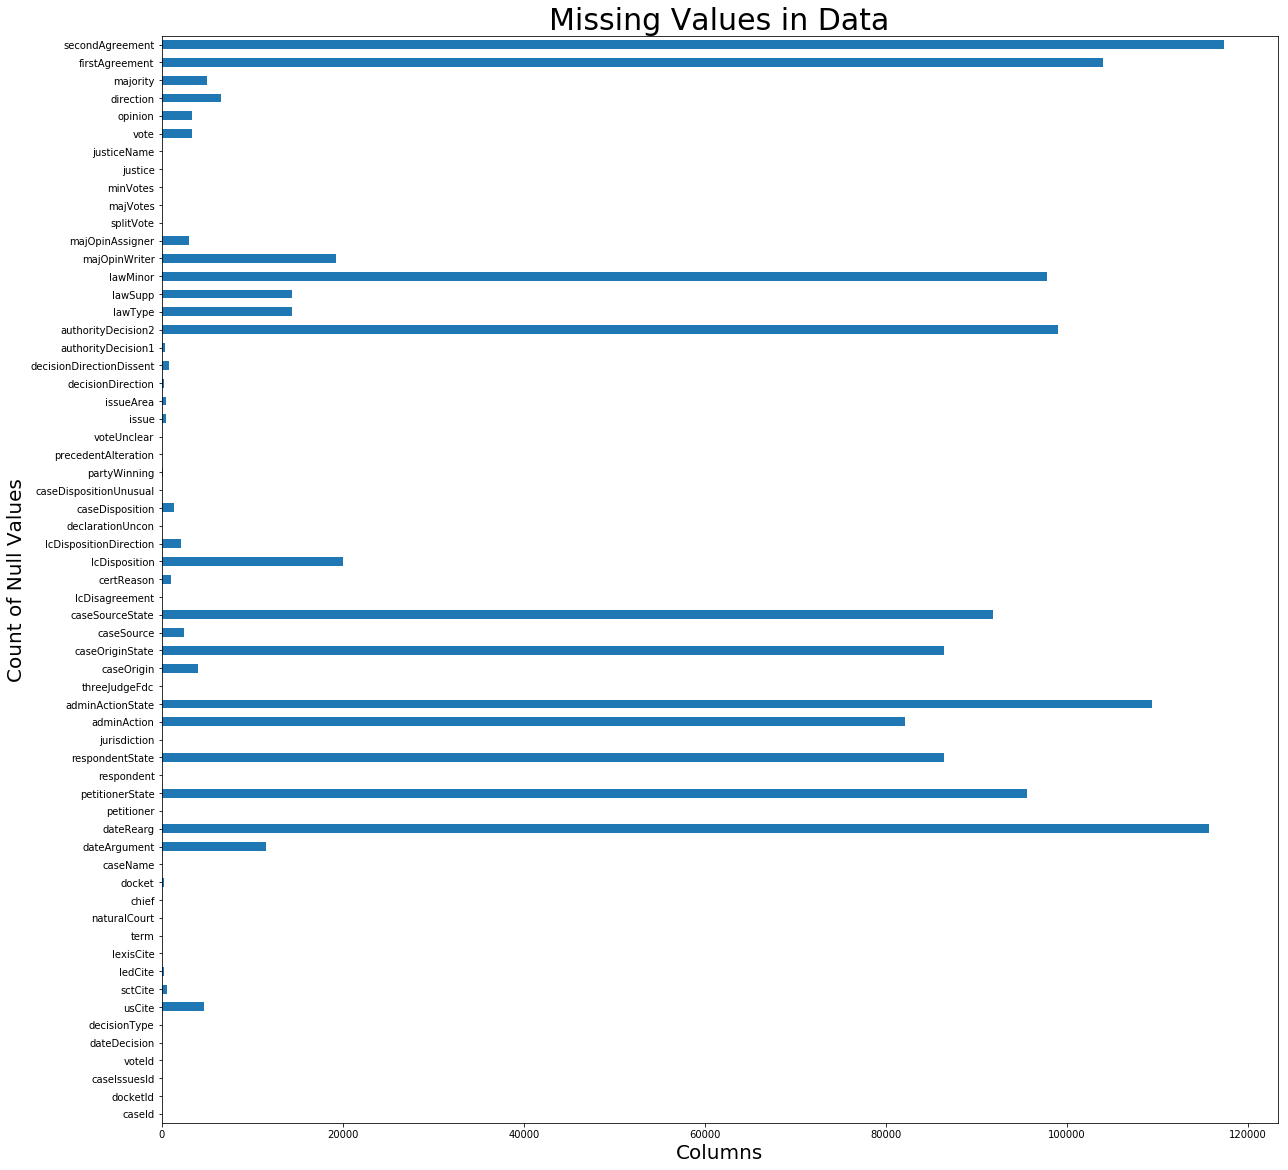

In [10]:
missingdata_plot = raw_dataset.isnull().sum().plot(kind='barh',
                                                   figsize = (20,20))
missingdata_plot.set_title('Missing Values in Data',fontsize = 30)    
missingdata_plot.set_xlabel('Columns',fontsize = 20)
missingdata_plot.set_ylabel('Count of Null Values',fontsize = 20)
pyplot.savefig('OutputCharts/NullValuesInOriginalDataset.jpg')

## Inferences as yet
1. Columns like dateRearg, adminActionState, caseSourceState, casOriginState, adminAction, respondentState and petitionerState have too much null values. It seems like we have to drop them.
2. There are a lot of object data types. We need to check them if type conversion is needed.

## Corelation between different numeric attributes

In [11]:
# correlation
set_option('precision', 2)
print(raw_dataset.corr(method='pearson'))

                          decisionType      term  naturalCourt  petitioner  \
decisionType                  1.00e+00 -6.47e-02     -4.31e-02   -1.73e-02   
term                         -6.47e-02  1.00e+00      9.69e-01   -9.72e-02   
naturalCourt                 -4.31e-02  9.69e-01      1.00e+00   -9.88e-02   
petitioner                   -1.73e-02 -9.72e-02     -9.88e-02    1.00e+00   
petitionerState               3.40e-02 -9.83e-02     -9.20e-02   -8.08e-02   
respondent                   -1.59e-02  2.15e-02      1.45e-02    5.68e-02   
respondentState              -2.45e-02 -2.94e-03     -2.19e-03    2.69e-02   
jurisdiction                  1.20e-01 -5.64e-02     -4.74e-02   -1.14e-01   
adminAction                   1.32e-02 -4.90e-02     -2.85e-02   -1.71e-01   
adminActionState             -1.69e-03 -6.28e-02     -7.56e-02    5.72e-02   
threeJudgeFdc                 1.83e-02 -7.79e-02     -6.85e-02    3.66e-03   
caseOrigin                    9.69e-02 -7.96e-02     -7.19e-02  

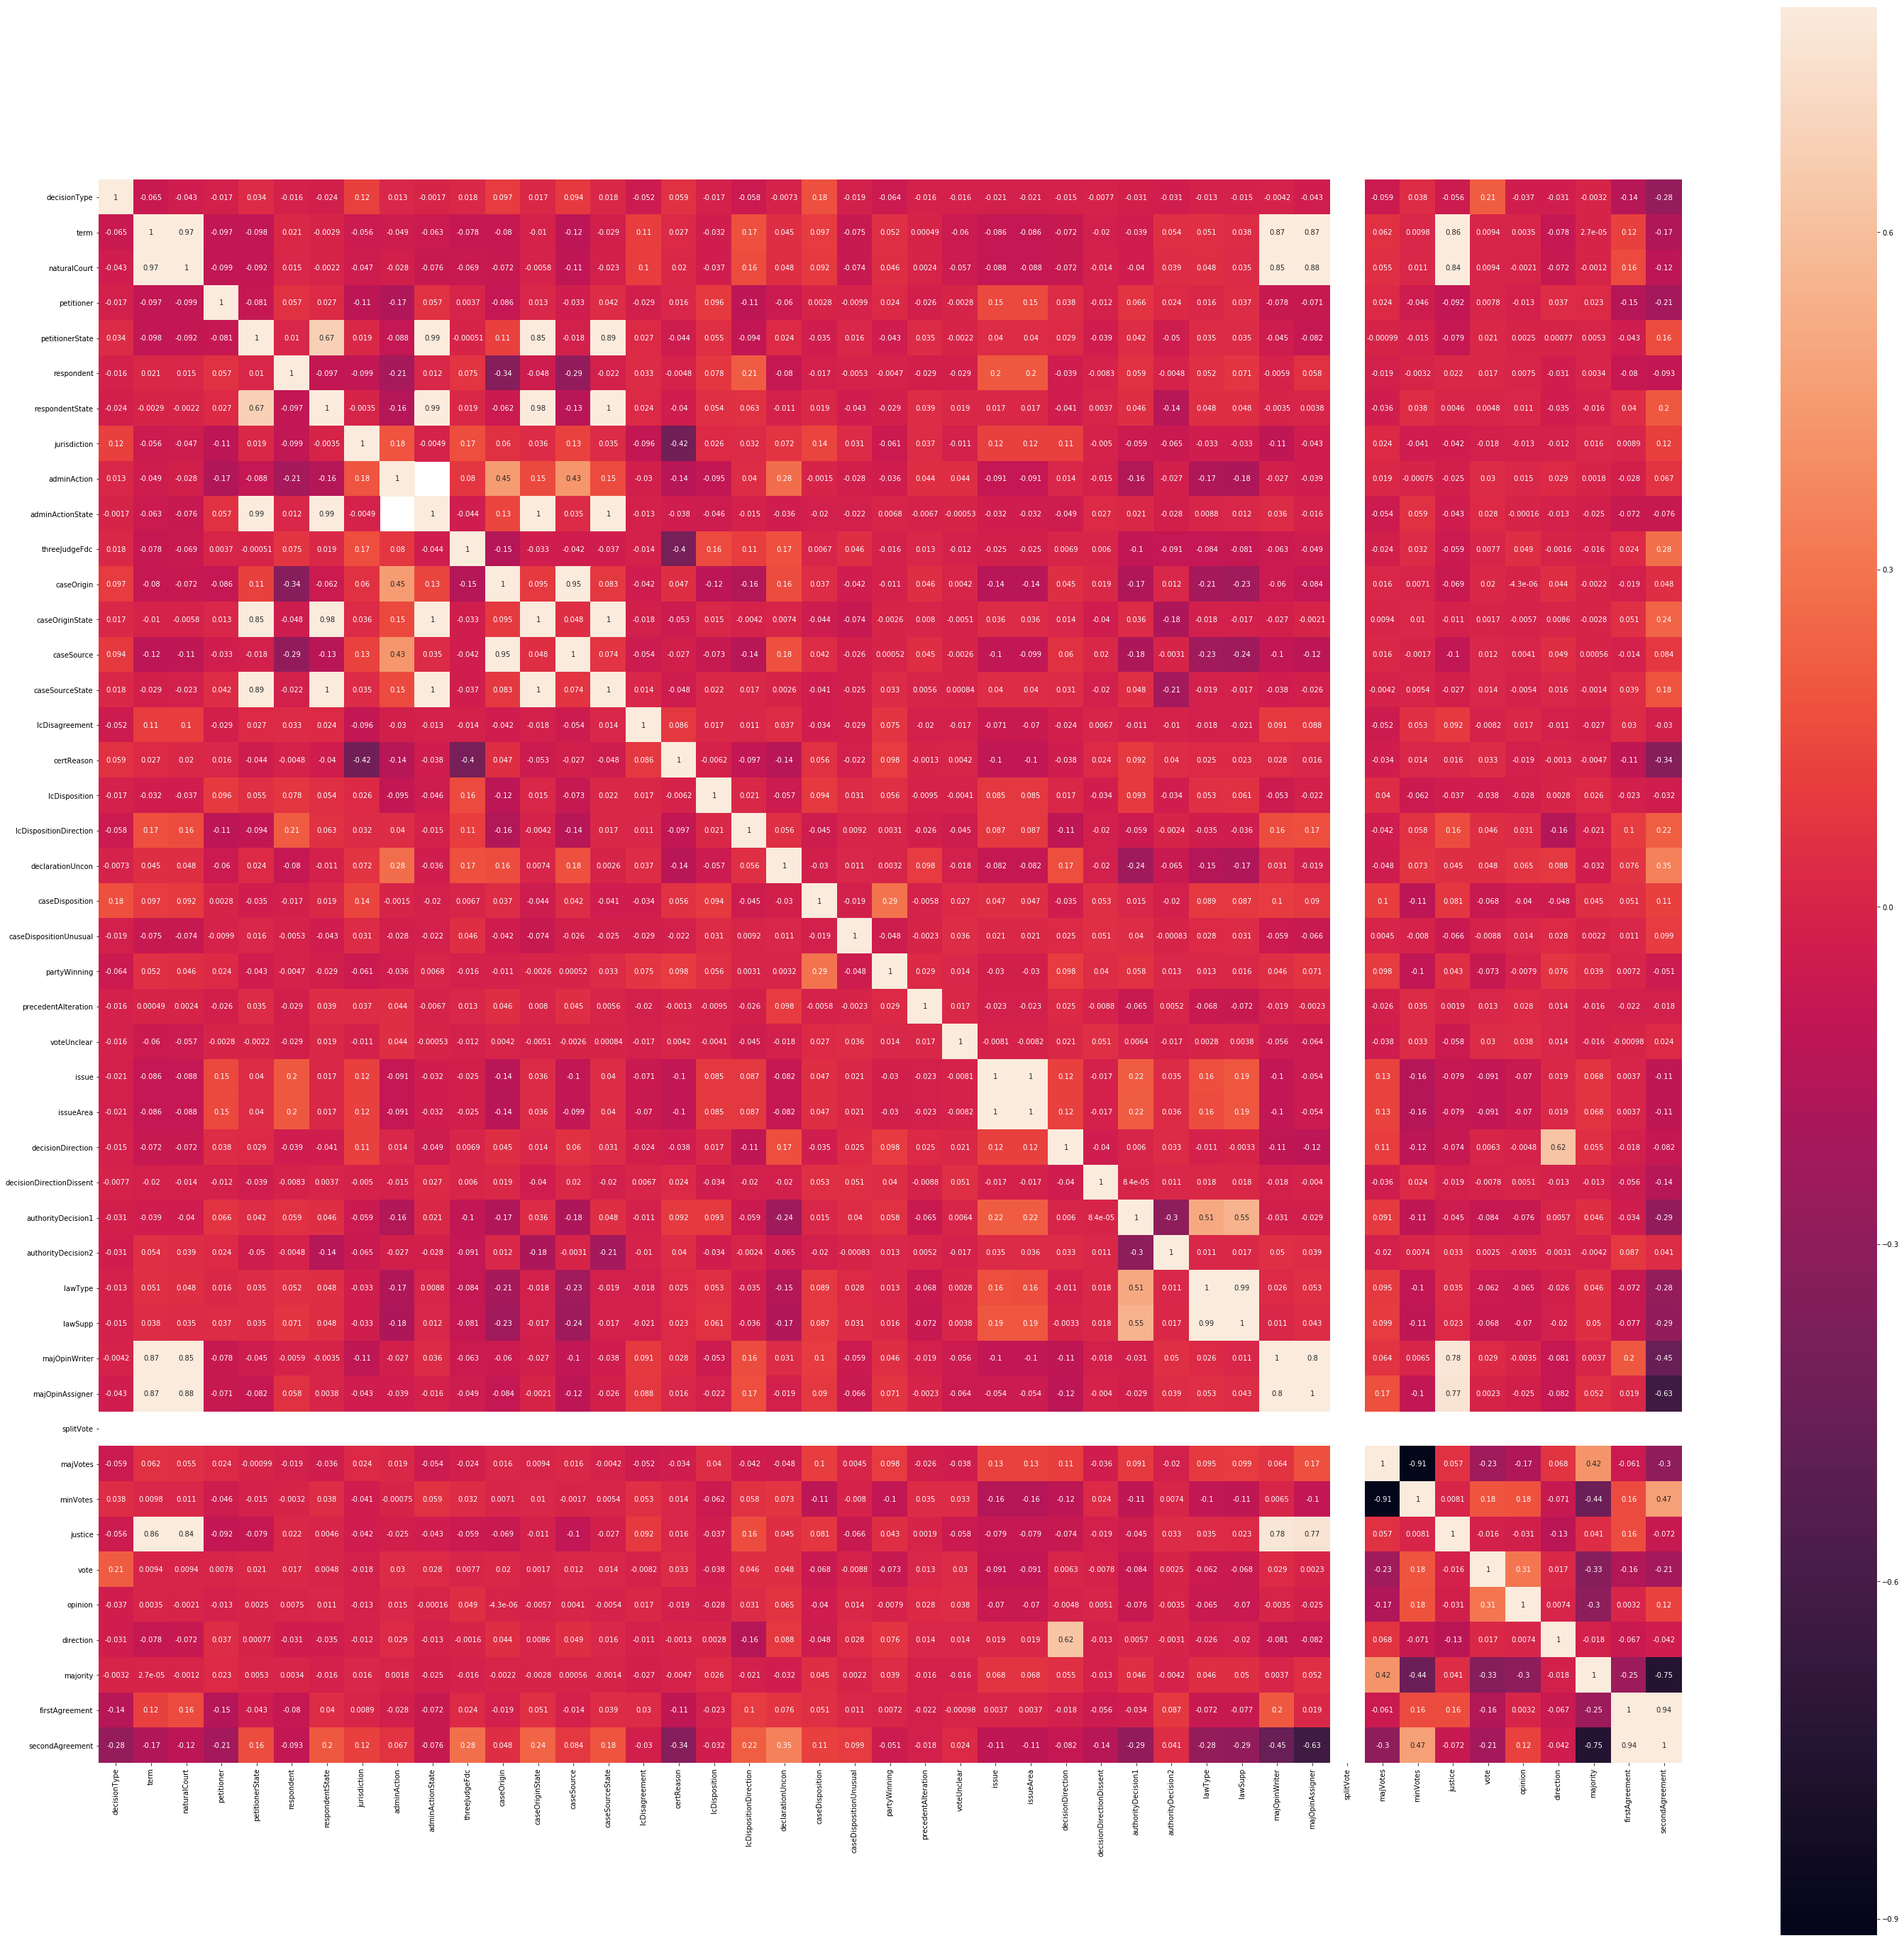

In [12]:
corrmat = raw_dataset.corr(method='pearson')
f, ax = pyplot.subplots(figsize = (50,50))
sn.heatmap(corrmat, vmax=0.8, square=True, annot=True)
pyplot.savefig('OutputCharts/CorelationMatrix.jpg')

## Visualizations

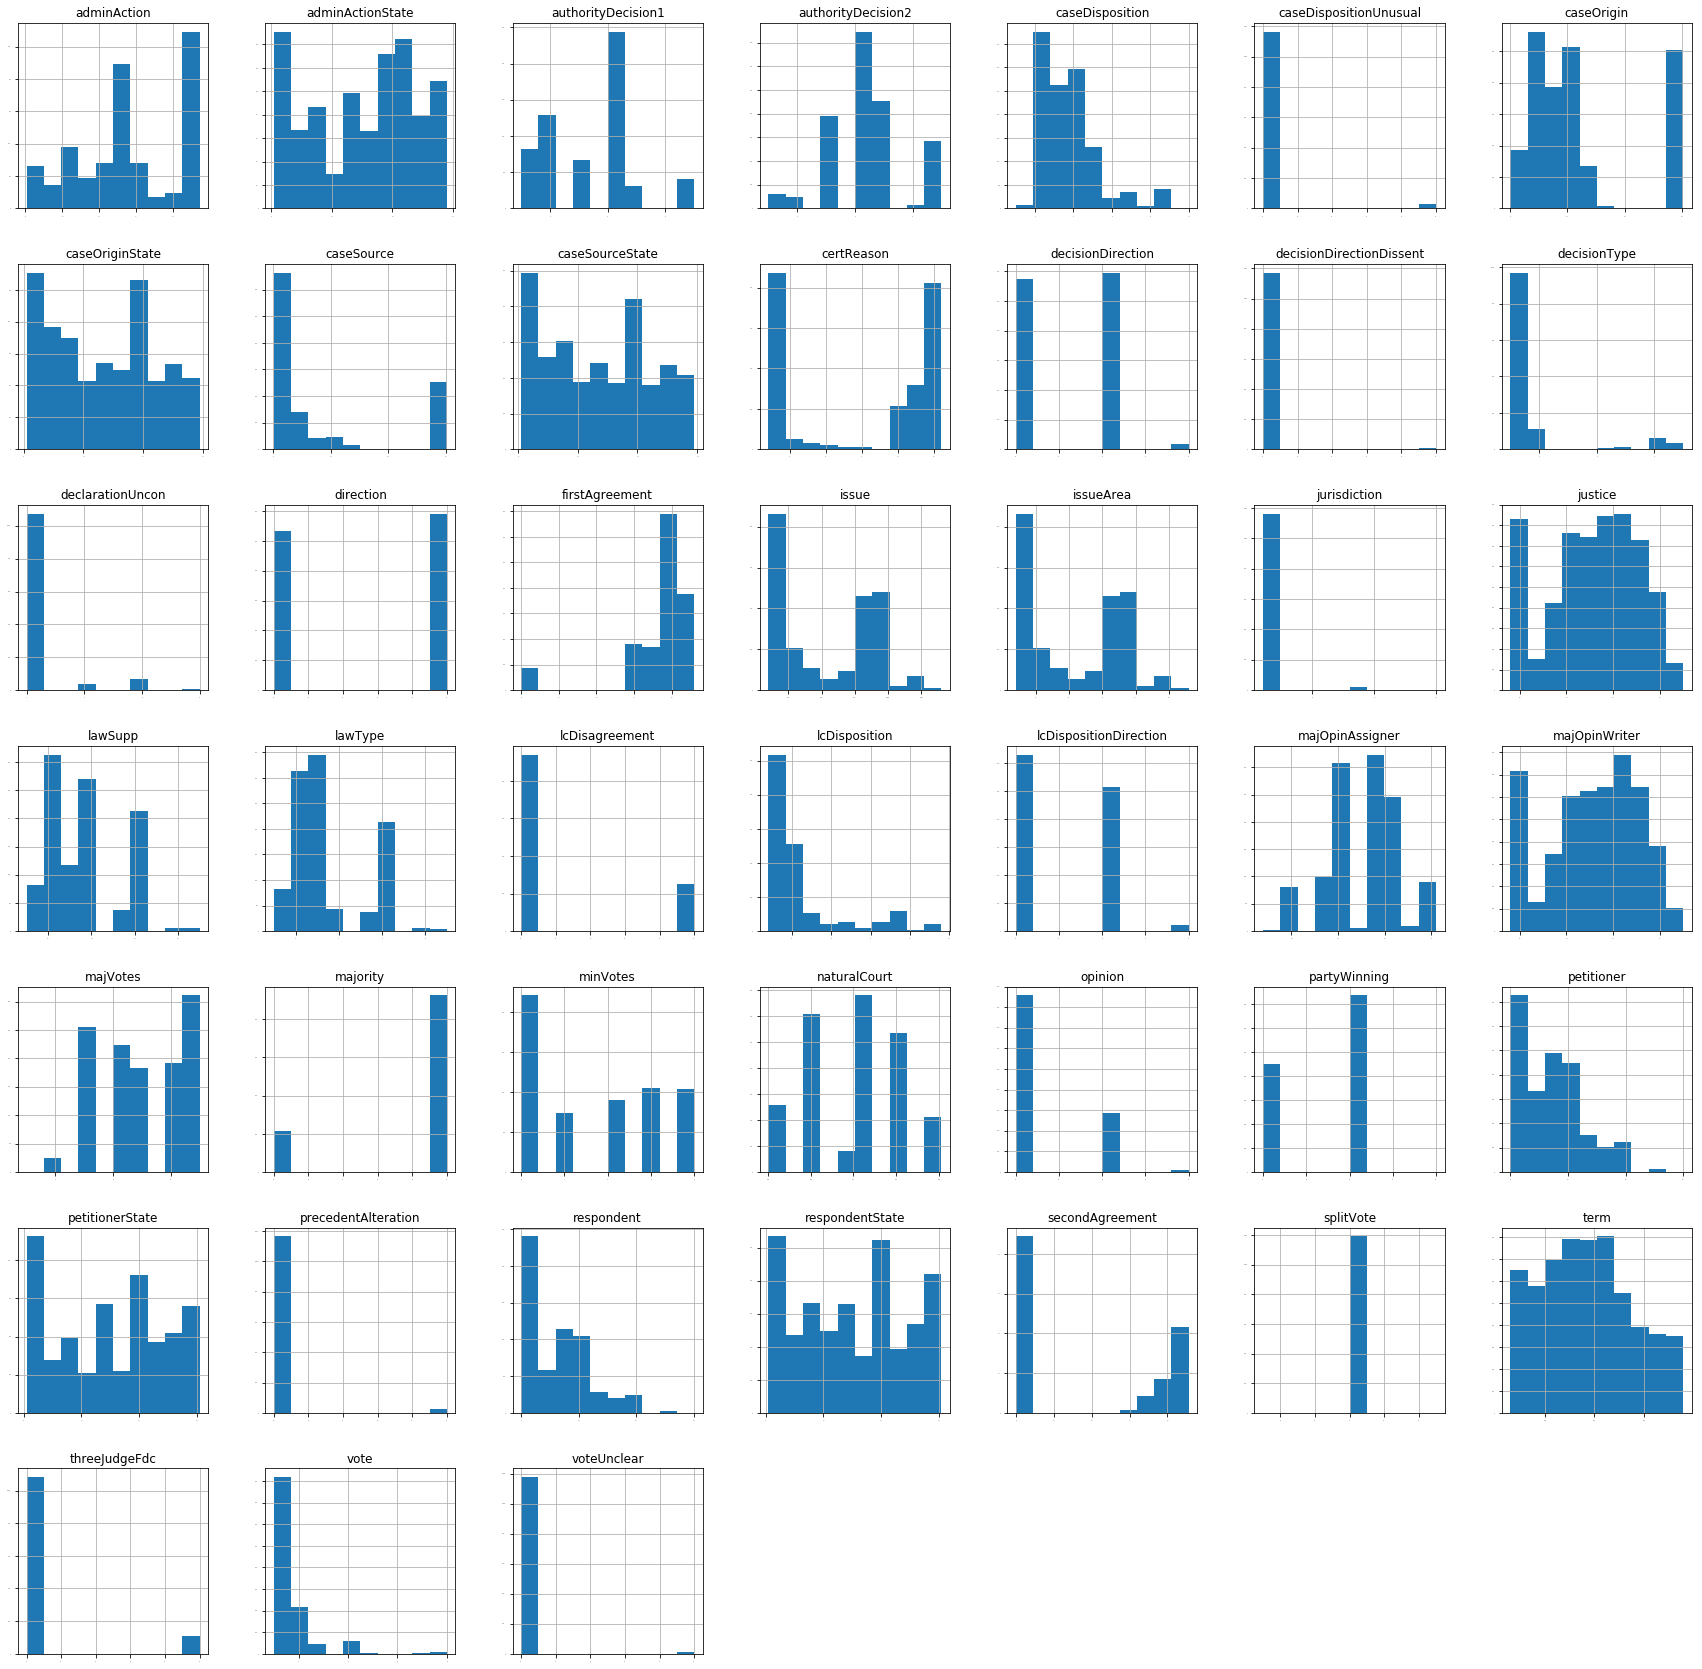

In [13]:
# histograms
raw_dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1 ,figsize=(30,30))
pyplot.show()
pyplot.savefig('OutputCharts/Histograms.jpg')

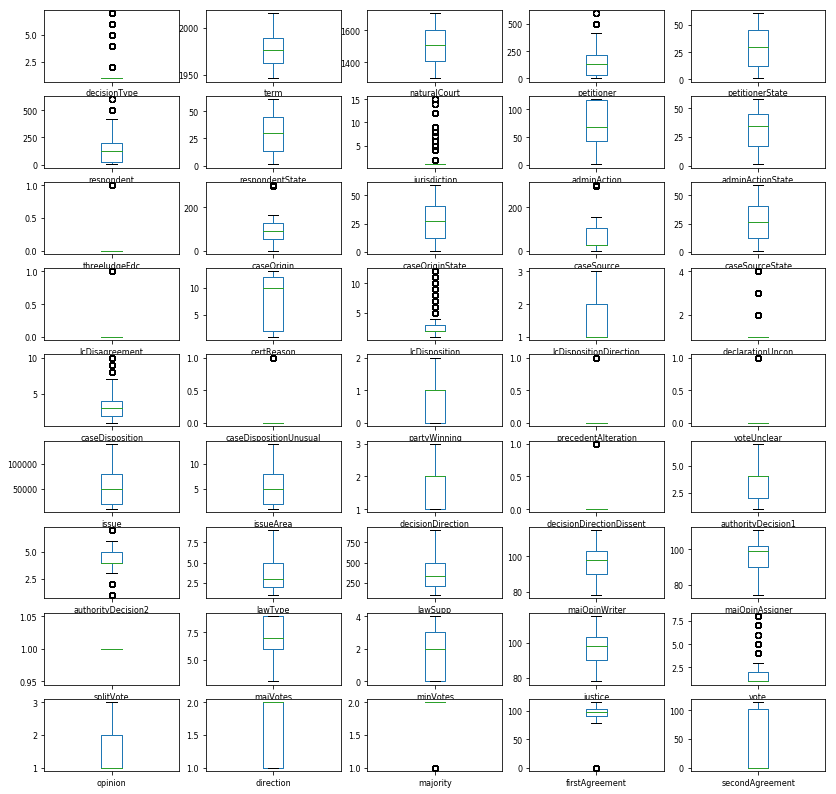

In [14]:
# box and whisker plots
raw_dataset.plot(kind='box', subplots=True, layout=(9,5), sharex=False, sharey=False, fontsize=8, figsize=(14,14))
pyplot.show()
pyplot.savefig('OutputCharts/BoxPlots.jpg')

## Missing value treatment
1. The following variables because of too many missing values.<br>
   a. secondAgreement<br>
   b. firstAgrement<br>
   c. lawMinor<br>
   d. authorDecision2<br>
   e. caseSourceState<br>
   f. caseOriginState<br>
   g. adminActionState<br>
   h. adminAction<br>
   i. respondentState<br>
   j. petitionerState<br>
   k. dateRearg<br>
   First, we will check if the values already present are having any information.

2. For other missing values, we will do treatment.

In [15]:
#Copy of the datset
temp_dataset = copy.deepcopy(raw_dataset)

In [16]:
#firstAgreement and secondAgreement
#We will divide the firstAgreement and secondAgreement into three categories:
    #1. Having a non zero value
    #2. Having zero value
    #3. Having null value
#time.process_time()
temp_dataset.loc[temp_dataset['firstAgreement'].isnull(), 'firstAgreementPresent'] = 2
temp_dataset.loc[temp_dataset['firstAgreement'].notnull(), 'firstAgreementPresent'] = 1
temp_dataset.loc[temp_dataset['firstAgreement'] == 0.0, 'firstAgreementPresent'] = 0
#time.process_time()
temp_dataset.loc[temp_dataset['secondAgreement'].isnull(), 'secondAgreementPresent'] = 2
temp_dataset.loc[temp_dataset['secondAgreement'].notnull(), 'secondAgreementPresent'] = 1
temp_dataset.loc[temp_dataset['secondAgreement'] == 0.0, 'secondAgreementPresent'] = 0
temp_dataset.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement,firstAgreementPresent,secondAgreementPresent
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN,2.0,2.0
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN,2.0,2.0
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN,2.0,2.0
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN,2.0,2.0
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN,2.0,2.0


In [17]:
temp_dataset.to_csv('OutputExcels/TemporaryDataSet.csv', sep=',', encoding='utf-8')

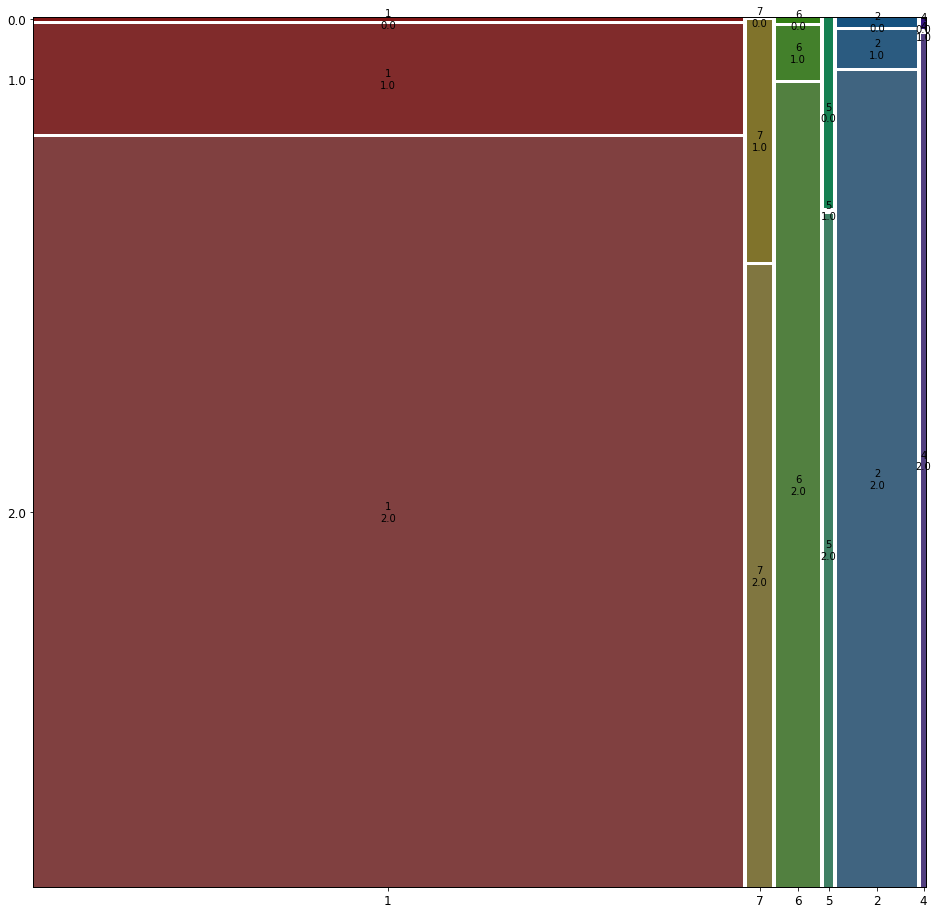

In [18]:
## Check the distribution of firstAgreementPresent and secondAgreementPresent across outcome variables

from statsmodels.graphics.mosaicplot import mosaic
pyplot.rcParams['font.size'] = 12.0
pyplot.rcParams["figure.figsize"] = [16,16]
mosaic(temp_dataset, ['decisionType', 'firstAgreementPresent']);

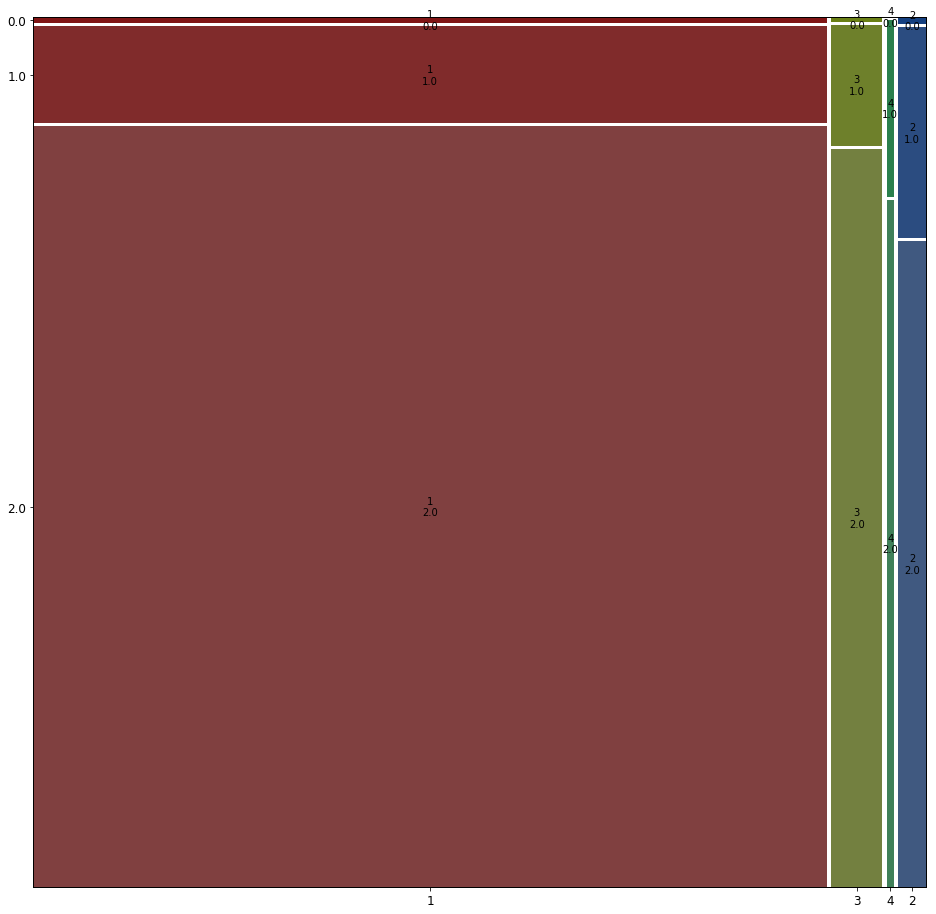

In [19]:
from statsmodels.graphics.mosaicplot import mosaic
pyplot.rcParams['font.size'] = 12.0
pyplot.rcParams["figure.figsize"] = [16,16]
mosaic(temp_dataset, ['declarationUncon', 'firstAgreementPresent']);

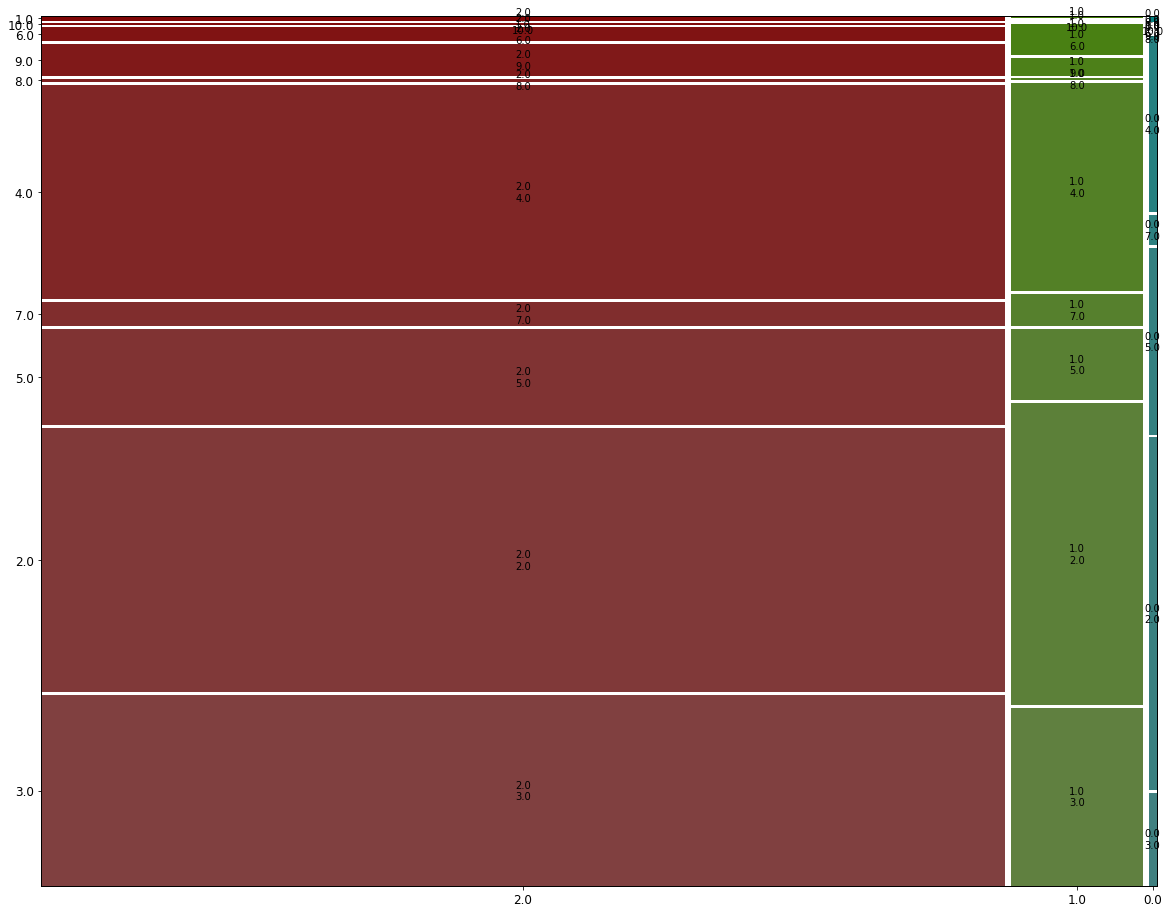

In [20]:
from statsmodels.graphics.mosaicplot import mosaic
pyplot.rcParams['font.size'] = 12.0
pyplot.rcParams["figure.figsize"] = [20,16]
mosaic(temp_dataset, ['firstAgreementPresent','caseDisposition']);

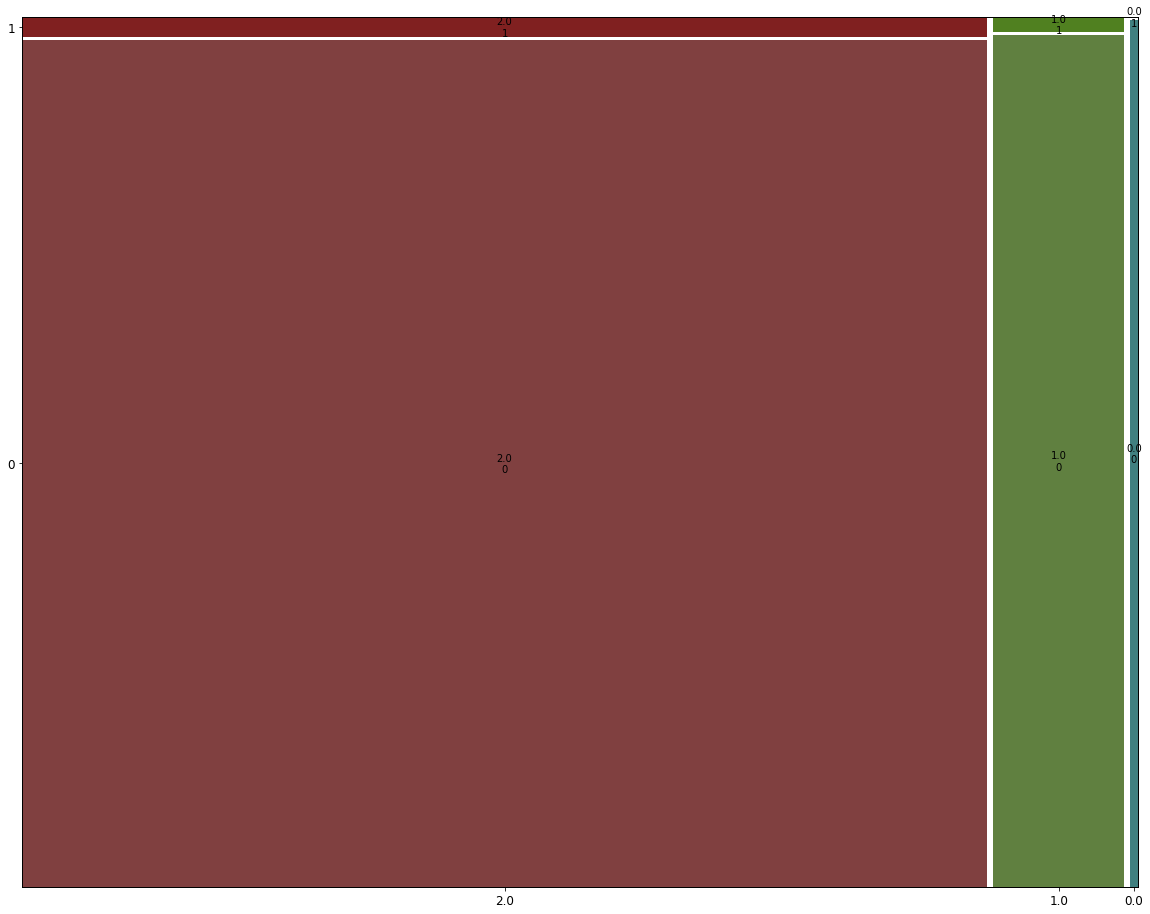

In [21]:
from statsmodels.graphics.mosaicplot import mosaic
pyplot.rcParams['font.size'] = 12.0
pyplot.rcParams["figure.figsize"] = [20,16]
mosaic(temp_dataset, ['firstAgreementPresent','caseDispositionUnusual']);

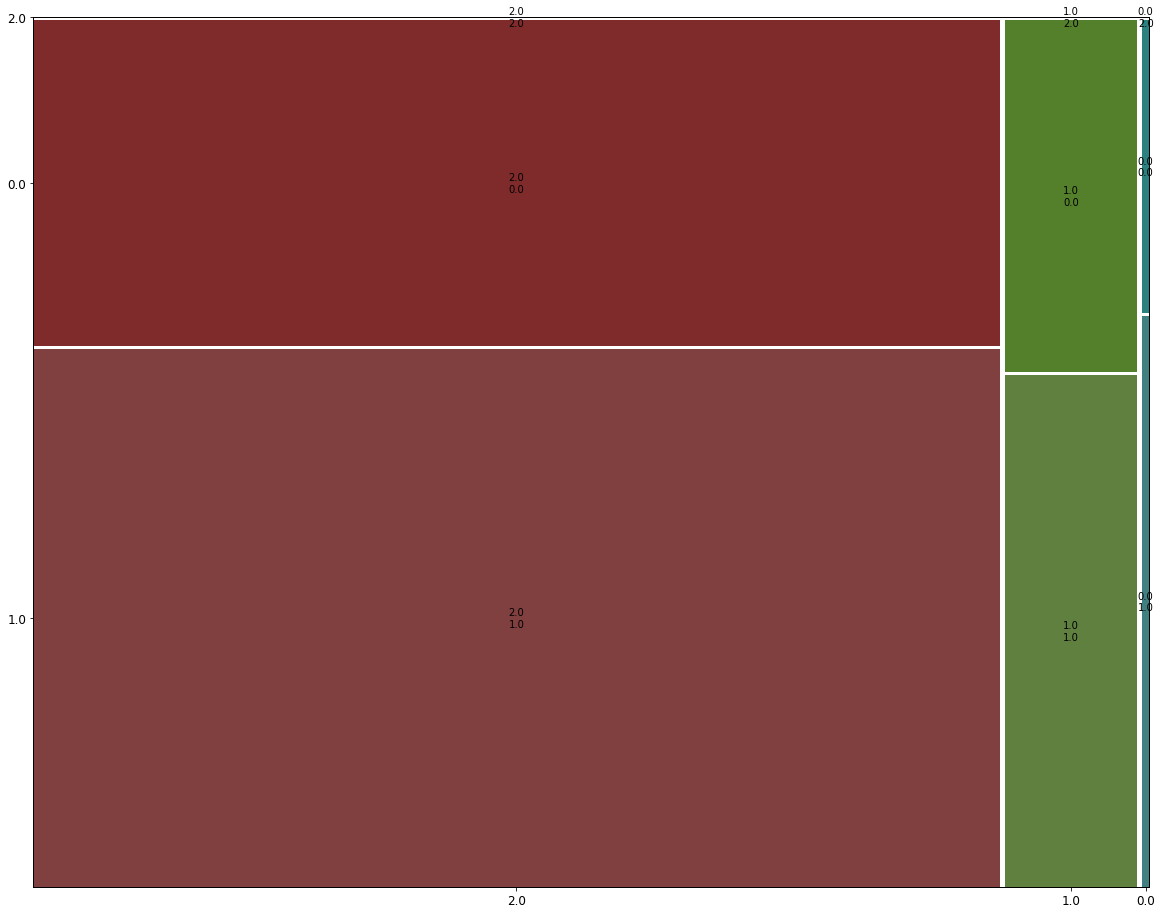

In [22]:
from statsmodels.graphics.mosaicplot import mosaic
pyplot.rcParams['font.size'] = 12.0
pyplot.rcParams["figure.figsize"] = [20,16]
mosaic(temp_dataset, ['firstAgreementPresent','partyWinning']);

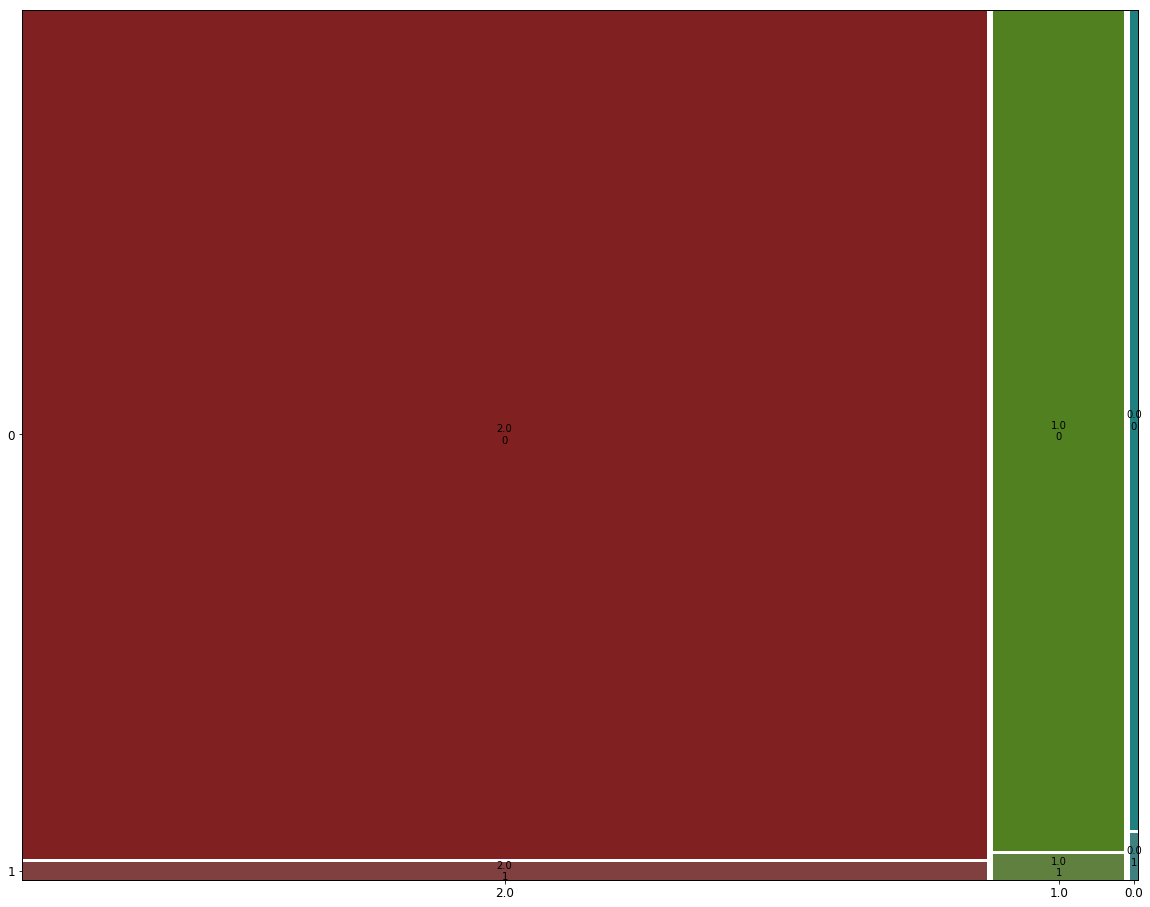

In [23]:
from statsmodels.graphics.mosaicplot import mosaic
pyplot.rcParams['font.size'] = 12.0
pyplot.rcParams["figure.figsize"] = [20,16]
mosaic(temp_dataset, ['firstAgreementPresent','precedentAlteration']);

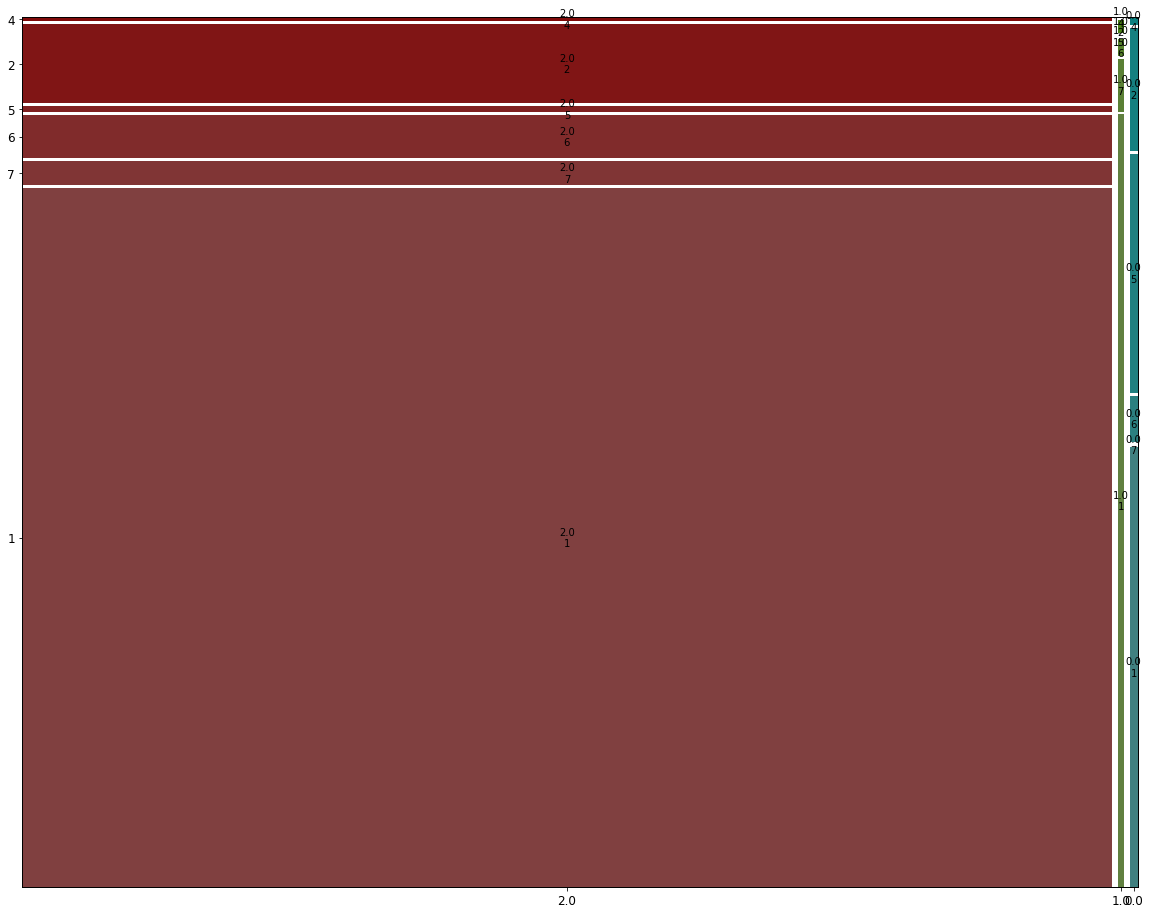

In [24]:
from statsmodels.graphics.mosaicplot import mosaic
pyplot.rcParams['font.size'] = 12.0
pyplot.rcParams["figure.figsize"] = [20,16]
mosaic(temp_dataset, ['secondAgreementPresent','decisionType']);

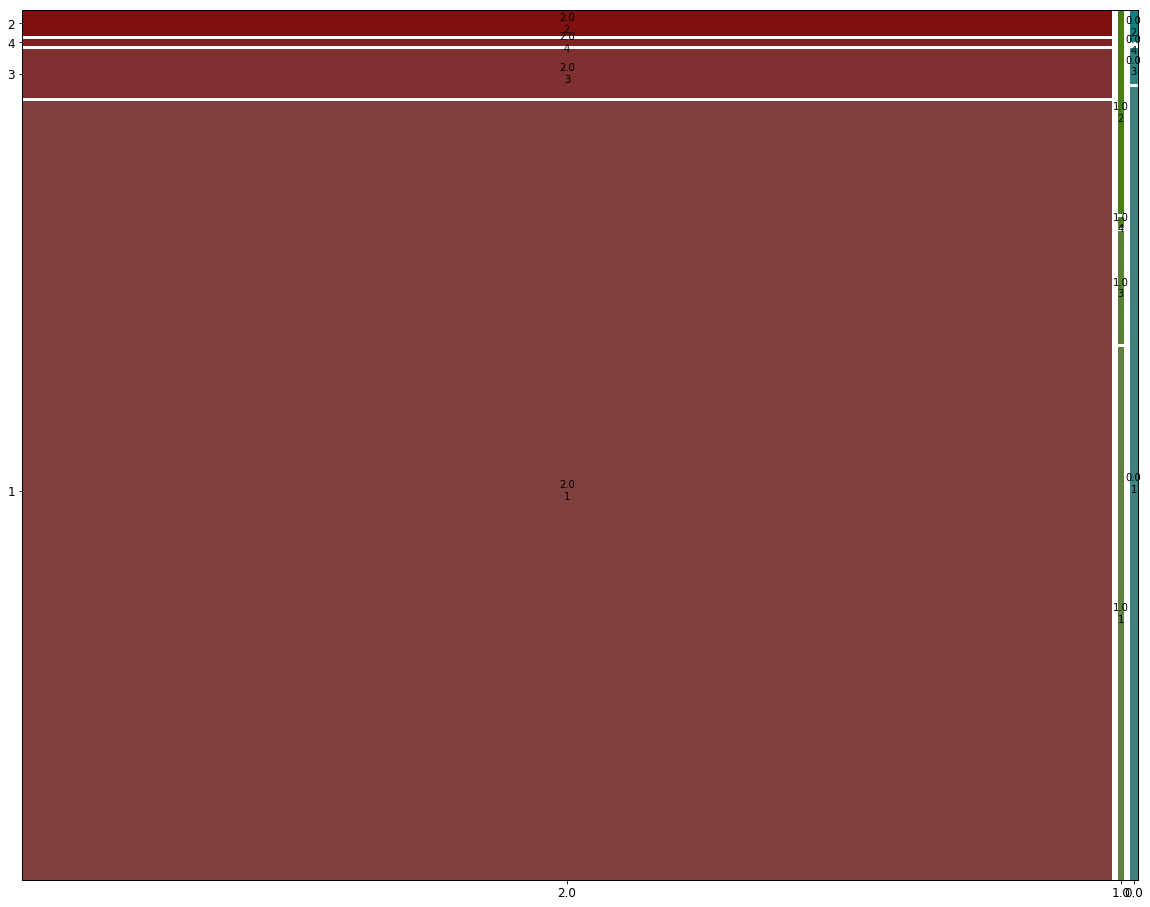

In [25]:
from statsmodels.graphics.mosaicplot import mosaic
pyplot.rcParams['font.size'] = 12.0
pyplot.rcParams["figure.figsize"] = [20,16]
mosaic(temp_dataset, ['secondAgreementPresent','declarationUncon']);

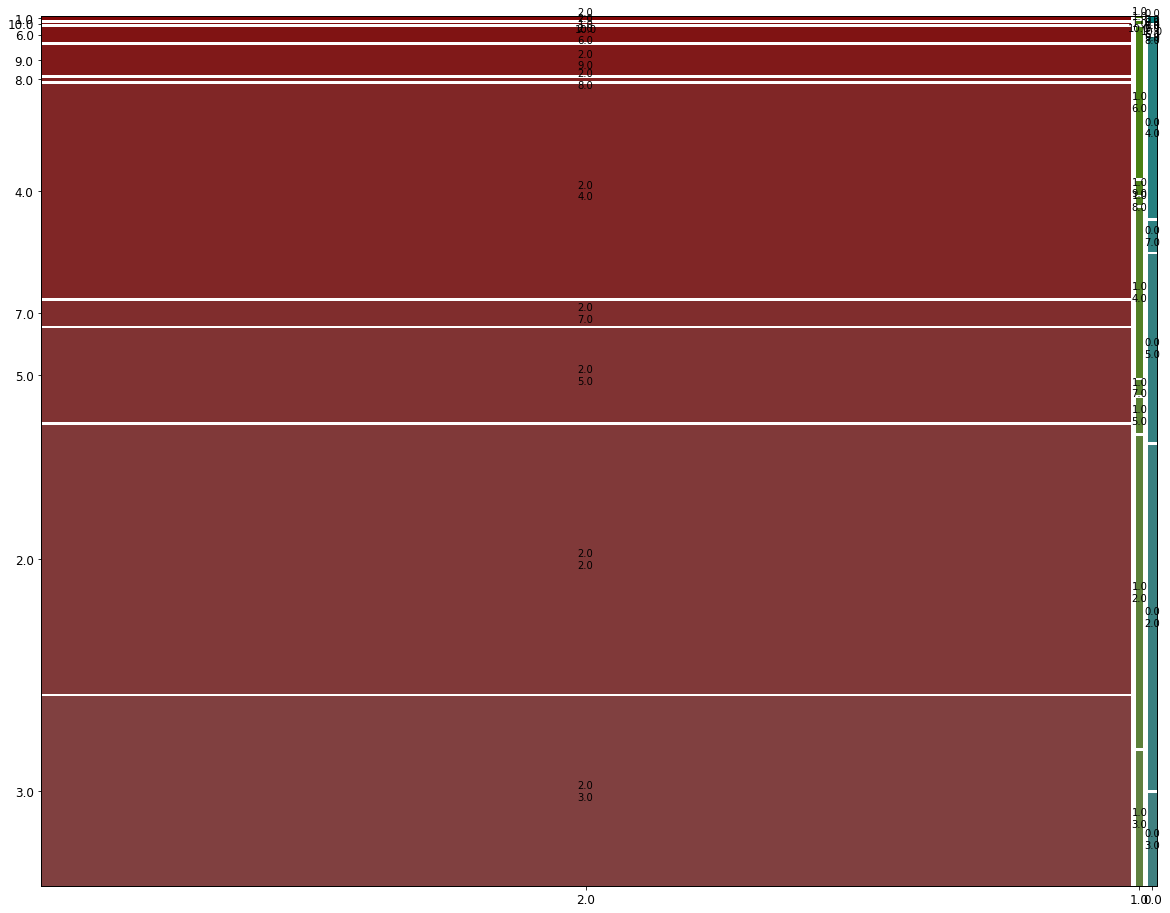

In [26]:
from statsmodels.graphics.mosaicplot import mosaic
pyplot.rcParams['font.size'] = 12.0
pyplot.rcParams["figure.figsize"] = [20,16]
mosaic(temp_dataset, ['secondAgreementPresent','caseDisposition']);

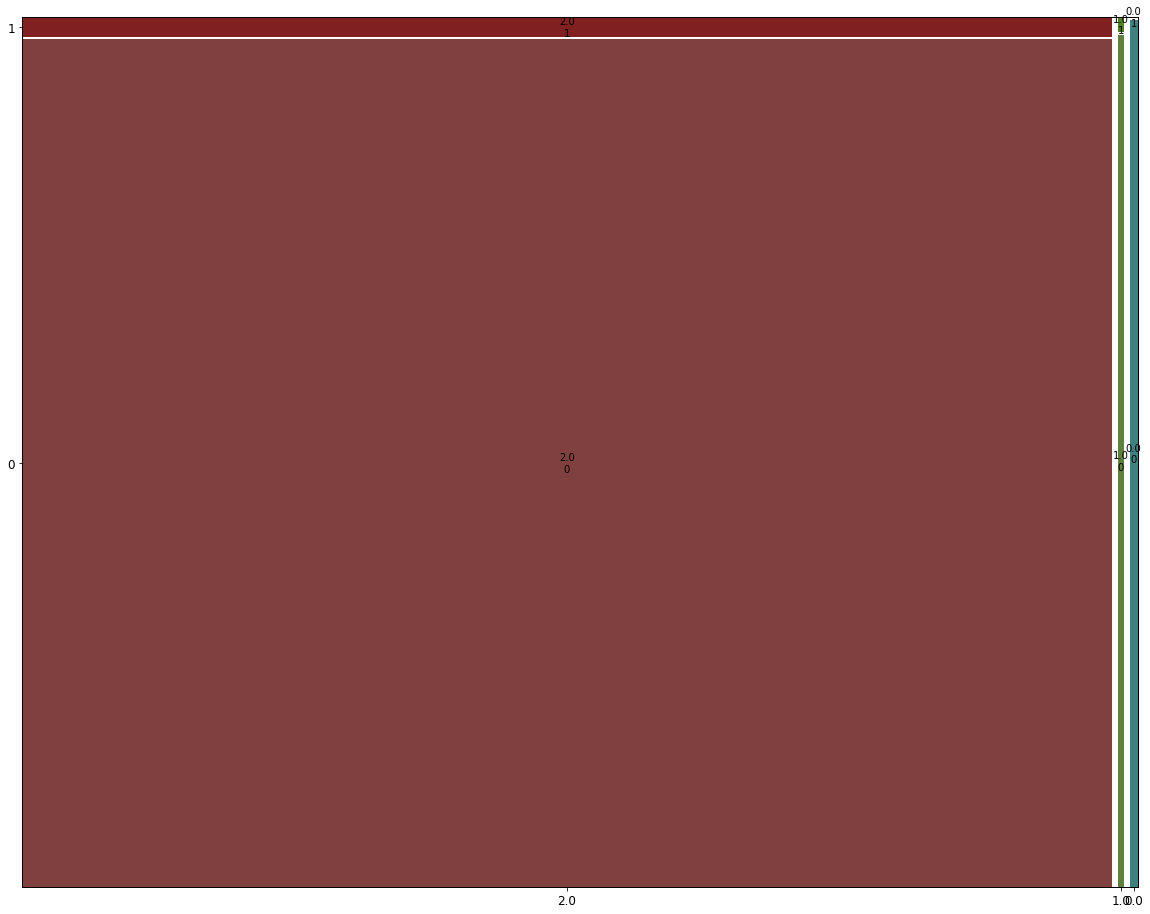

In [27]:
from statsmodels.graphics.mosaicplot import mosaic
pyplot.rcParams['font.size'] = 12.0
pyplot.rcParams["figure.figsize"] = [20,16]
mosaic(temp_dataset, ['secondAgreementPresent','caseDispositionUnusual']);

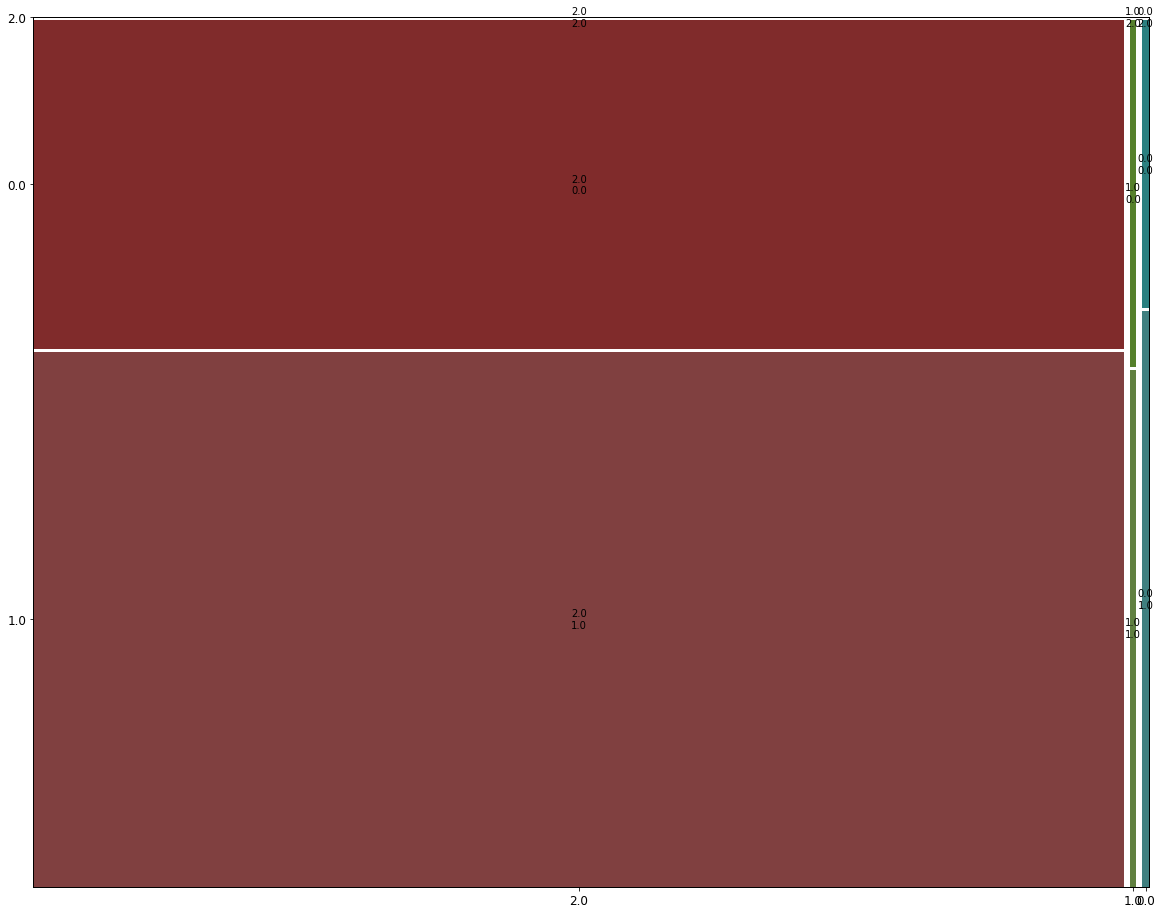

In [28]:
from statsmodels.graphics.mosaicplot import mosaic
pyplot.rcParams['font.size'] = 12.0
pyplot.rcParams["figure.figsize"] = [20,16]
mosaic(temp_dataset, ['secondAgreementPresent','partyWinning']);

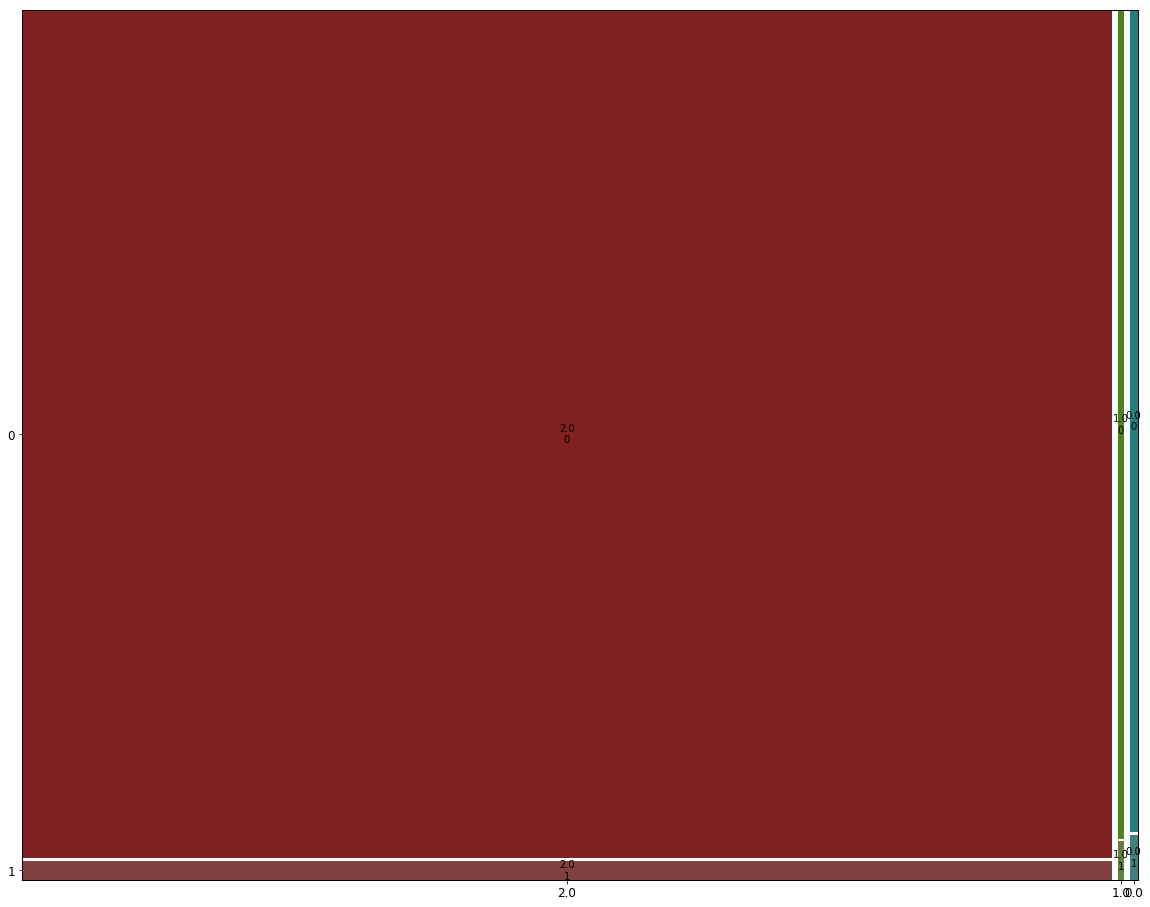

In [29]:
from statsmodels.graphics.mosaicplot import mosaic
pyplot.rcParams['font.size'] = 12.0
pyplot.rcParams["figure.figsize"] = [20,16]
mosaic(temp_dataset, ['secondAgreementPresent','precedentAlteration']);

### Inferences:
The presence of first and second Agreement seems to be uniformly distributed across different values of all the outcome variables.<br>
We shall wait till we get the information value of all variables before deciding on dropping these variables.<br>
For now we will drop the original attributes.

In [30]:
# Drop firstAgreement and secondAgreement from temp dataset.
temp_dataset.drop(['firstAgreement', 'secondAgreement'], axis = 1, inplace=True)
temp_dataset.columns

Index(['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
       'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term',
       'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument',
       'dateRearg', 'petitioner', 'petitionerState', 'respondent',
       'respondentState', 'jurisdiction', 'adminAction', 'adminActionState',
       'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource',
       'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'caseDisposition',
       'caseDispositionUnusual', 'partyWinning', 'precedentAlteration',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2',
       'lawType', 'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner',
       'splitVote', 'majVotes', 'minVotes', 'justice', 'justiceName', 'vote',
       'opinion', 'direction', 'majority', 'firstA

### Feature Selection

Following variables all have year infomration contained in them. We will merge these variables to two variables - year of case and year of sentence. <br><b>
- caseId<br>
- docketId<br>
- caseIssuesId<br>
- voteId<br>
- dateDecision<br>
- term<br>
- dateArgument<br>
- dateRearg</b><br>

The <b>chief</b> variable informs who was the chief justice during the period of time and it is a constant across a certain period of time. This should not provide much information for case prediction. So, a candidate to be dropped.

<b>caseName</b> provides the information about the parties involved in the lawsuite.<br>
This can provide us the following information:<br>
- Are the parties institutions or individuals?
- If instituiton, are they government institutions?

<b>justiceName</b> variable gives the name of the justice pronouncing the sentence, this can be a variable influencing the outcome.<br>
However, this variable would also be limited to a time period restricted to the tenure of the justice.

Following variables are citations:
<br>
- <b>usCite
- sctCite
- ledCite
- lexisCite</b>
<br>

However, these do not have the literature of the citations. So, we will check for the presence of these citations in a case and then see if the presence impacts the outcome.

## Treating the year fields

Merge caseId, docketId, caseIssuesId and voteId to a single field denoting the year - yearofCaseInitiate

In [31]:
temp_dataset['yearOfCaseInitiate'] = temp_dataset.caseId.str.split('-').str[0]

In [32]:
temp_dataset['yearOfCaseInitiate'].head()

0    1946
1    1946
2    1946
3    1946
4    1946
Name: yearOfCaseInitiate, dtype: object

In [33]:
## Any null values?
temp_dataset['yearOfCaseInitiate'].isnull().sum()

0

In [34]:
#Drop the original columns
temp_dataset.drop(['caseId', 'docketId','caseIssuesId','voteId'], axis = 1, inplace=True)

## Get the year of Decision

In [35]:
temp_dataset['dateDecision'].tail()

118961    6/26/2017
118962    6/26/2017
118963    6/26/2017
118964    6/26/2017
118965    6/26/2017
Name: dateDecision, dtype: object

In [36]:
temp_dataset['dateDecision'] = temp_dataset.dateDecision.str.replace('\/', '-')

In [37]:
temp_dataset['yearOfDecision'] = temp_dataset.dateDecision.str.split('-').str[2]

In [38]:
temp_dataset['yearOfDecision'].isnull().sum()

0

In [39]:
temp_dataset['yearOfDecision'].tail()

118961    2017
118962    2017
118963    2017
118964    2017
118965    2017
Name: yearOfDecision, dtype: object

## Date of Argument and Reargument have missing values.
So, we will do the following:
<br>
- All null valued cells are to be converted to 0
- Have two more columns - argumentMade and reargumentMade. They will have a 1 if value present and a 0 if null

In [40]:
#dateArgument
temp_dataset['argumentMade'] = numpy.where(temp_dataset.dateArgument.isnull(), 0, 1)
temp_dataset['dateArgument'] = temp_dataset['dateArgument'].fillna(0)

In [41]:
print('Null Values in argumentMade',temp_dataset['argumentMade'].isnull().sum())
print('Null Values in dateArgument',temp_dataset['dateArgument'].isnull().sum())

Null Values in argumentMade 0
Null Values in dateArgument 0


In [42]:
#dateRearg
temp_dataset['reargMade'] = numpy.where(temp_dataset.dateRearg.isnull(), 0, 1)
temp_dataset['dateRearg'] = temp_dataset['dateRearg'].fillna(0)

In [43]:
print('Null Values in reargMade',temp_dataset['reargMade'].isnull().sum())
print('Null Values in dateRearg',temp_dataset['dateRearg'].isnull().sum())

Null Values in reargMade 0
Null Values in dateRearg 0


## Citations Variables Treatment

In [44]:
#usCite, sctCite, ledCite, lexisCite
print('Null Values in usCite',temp_dataset['usCite'].isnull().sum())
print('Null Values in sctCite',temp_dataset['sctCite'].isnull().sum())
print('Null Values in ledCite',temp_dataset['ledCite'].isnull().sum())
print('Null Values in lexisCite',temp_dataset['lexisCite'].isnull().sum())

Null Values in usCite 4642
Null Values in sctCite 593
Null Values in ledCite 226
Null Values in lexisCite 0


There are no null values in lexisCite. At this point, we are not sure if we would achieve any information from this variable. We can examine this later and if need be drop the attribute.
<br>
For others, we will introduce a binary variable and drop the original variables.

In [45]:
#usCite
temp_dataset['usCitePresent'] = numpy.where(temp_dataset.usCite.isnull(), 1, 0)

#sctCite
temp_dataset['sctCitePresent'] = numpy.where(temp_dataset.sctCite.isnull(), 1, 0)

#ledCite
temp_dataset['ledCitePresent'] = numpy.where(temp_dataset.ledCite.isnull(), 1, 0)

In [46]:
# Drop the three variables
temp_dataset.drop(['usCite'], axis = 1, inplace=True)
temp_dataset.drop(['sctCite'], axis = 1, inplace=True)
temp_dataset.drop(['ledCite'], axis = 1, inplace=True)

## Treatment of Majority
<b>majority</b> has the values 1 or 2. This is categorical variable.
We can assign 0 to all missing values, which would mean a class which do not have the information.

In [47]:
temp_dataset['majority'] = temp_dataset['majority'].fillna(0)

## Treatment of Opinion
Similarly, <b>opinion</b> has the values 1, 2 or 3 and is a categorical variable.
We will assign 0 to all missing values.

In [48]:
temp_dataset['opinion'] = temp_dataset['opinion'].fillna(0)

## Treatment of vote
<b>vote</b> has values ranging from 1 to 8. Assign 0 to all missing values

In [49]:
temp_dataset['opinion'] = temp_dataset['opinion'].fillna(0)

## Treatment of majOpinAssigner
Missing values are present till year 2010. 
<br>
This might not have enough information value for cases in the current years.
<br>
But instead of dropping the records, we will imute the missing values with the median value.

In [50]:
print('Median of majOpinAssigner: ',temp_dataset['majOpinAssigner'].median())

Median of majOpinAssigner:  99.0


In [51]:
# Impute missing values with median
temp_dataset['majOpinAssigner'] = temp_dataset['majOpinAssigner'].fillna(temp_dataset['majOpinAssigner'].median())

## Treatment of majOpinWriter
<b>majOpinWriter</b> will have simlar treatment as <b>majOpinAssigner</b>

In [52]:
print('Median of majOpinWriter: ',temp_dataset['majOpinWriter'].median())

Median of majOpinWriter:  98.0


In [53]:
# Impute missing values with median
temp_dataset['majOpinWriter'] = temp_dataset['majOpinWriter'].fillna(temp_dataset['majOpinWriter'].median())

## Treatment of lawMinor
To treat missing values in <b>lawMinor</b> we will do the following:
- Create new columns, lawMinorPresent, 0 if not present, 1 if present
- Impute missing values in original column with 0

In [54]:
#dateArgument
temp_dataset['lawMinorPresent'] = numpy.where(temp_dataset.lawMinor.isnull(), 0, 1)
temp_dataset['lawMinor'] = temp_dataset['lawMinor'].fillna(0)

## Treatment of lawSupp
Impute missing values with median

In [55]:
print('Median of lawSupp: ',temp_dataset['lawSupp'].median())

Median of lawSupp:  341.0


In [56]:
# Impute missing values with median
temp_dataset['lawSupp'] = temp_dataset['lawSupp'].fillna(temp_dataset['lawSupp'].median())

## Treatment of lawType
Impute missing values with median

In [57]:
print('Median of lawType: ',temp_dataset['lawType'].median())
# Impute missing values with median
temp_dataset['lawType'] = temp_dataset['lawType'].fillna(temp_dataset['lawType'].median())

Median of lawType:  3.0


## Treatment of authorityDecision2
<b>authorityDecision2</b> has values ranging from 1 to 7. Assign 0 to all missing values

In [58]:
temp_dataset['authorityDecision2'] = temp_dataset['authorityDecision2'].fillna(0)

## Treatment of authorityDecision1
<b>authorityDecision1</b> has values ranging from 1 to 7. Assign 0 to all missing values

In [59]:
temp_dataset['authorityDecision1'] = temp_dataset['authorityDecision2'].fillna(0)

## Treatment of decisionDirectionDissent
Has values of 0 and 1. Impute with median

In [60]:
print('Median of decisionDirectionDissent: ',temp_dataset['decisionDirectionDissent'].median())
# Impute missing values with median
temp_dataset['decisionDirectionDissent'] = temp_dataset['decisionDirectionDissent'].fillna(temp_dataset['decisionDirectionDissent'].median())

Median of decisionDirectionDissent:  0.0


## Treatment of decisionDirection
Has values of 1,2 and 3. Impute with median

In [61]:
print('Median of decisionDirection: ',temp_dataset['decisionDirection'].median())
# Impute missing values with median
temp_dataset['decisionDirection'] = temp_dataset['decisionDirection'].fillna(temp_dataset['decisionDirection'].median())

Median of decisionDirection:  2.0


## Treatment of issueArea
Impute with median

In [62]:
print('Median of issueArea: ',temp_dataset['issueArea'].median())
# Impute missing values with median
temp_dataset['issueArea'] = temp_dataset['issueArea'].fillna(temp_dataset['issueArea'].median())

Median of issueArea:  5.0


## Treatment of issue
Impute with median.

In [63]:
print('Median of issue: ',temp_dataset['issue'].median())
# Impute missing values with median
temp_dataset['issue'] = temp_dataset['issue'].fillna(temp_dataset['issue'].median())

Median of issue:  50020.0


## Treatment of caseDisposition

In [64]:
print('Null Values in caseDisposition',temp_dataset['caseDisposition'].isnull().sum())

Null Values in caseDisposition 1427


<b>caseDisposition</b> is an outcome variable and blanks value are present till 2014. There are only 1427 missing values. So we will drop the rows.

In [65]:
temp_dataset = copy.deepcopy(temp_dataset.dropna(subset=['caseDisposition']))

## Treatment of lcDispositionDirection
Impute with median.

In [66]:
print('Median of lcDispositionDirection: ',temp_dataset['lcDispositionDirection'].median())
# Impute missing values with median
temp_dataset['lcDispositionDirection'] = temp_dataset['lcDispositionDirection'].fillna(temp_dataset['lcDispositionDirection'].median())

Median of lcDispositionDirection:  1.0


## Treatment of lcDisposition
Impute with median.

In [67]:
print('Median of lcDisposition: ',temp_dataset['lcDisposition'].median())
# Impute missing values with median
temp_dataset['lcDisposition'] = temp_dataset['lcDisposition'].fillna(temp_dataset['lcDisposition'].median())

Median of lcDisposition:  2.0


## Treatment of certReason
Impute with median.

In [68]:
print('Median of certReason: ',temp_dataset['certReason'].median())
# Impute missing values with median
temp_dataset['certReason'] = temp_dataset['certReason'].fillna(temp_dataset['certReason'].median())

Median of certReason:  10.0


## Treatment of caseSourceState, caseOriginState, adminActionState, respondentState, petitionerState.

These variables are geographic variables and are already encoded. But there are a lot of missing values. 
<br>
We will assign value 0 to all missing values.

In [69]:
temp_dataset['caseSourceState'] = temp_dataset['caseSourceState'].fillna(0)
temp_dataset['caseOriginState'] = temp_dataset['caseOriginState'].fillna(0)
temp_dataset['adminActionState'] = temp_dataset['adminActionState'].fillna(0)
temp_dataset['respondentState'] = temp_dataset['respondentState'].fillna(0)
temp_dataset['petitionerState'] = temp_dataset['petitionerState'].fillna(0)

## Treatment of caseSource
Impute with median.

In [70]:
print('Median of caseSource: ',temp_dataset['caseSource'].median())
# Impute missing values with median
temp_dataset['caseSource'] = temp_dataset['caseSource'].fillna(temp_dataset['caseSource'].median())

Median of caseSource:  29.0


## Treatment of caseOrigin
Impute with median.

In [71]:
print('Median of caseOrigin: ',temp_dataset['caseOrigin'].median())
# Impute missing values with median
temp_dataset['caseOrigin'] = temp_dataset['caseOrigin'].fillna(temp_dataset['caseOrigin'].median())

Median of caseOrigin:  92.0


## Treatment of adminAction
Impute with median.

In [72]:
print('Median of adminAction: ',temp_dataset['adminAction'].median())
# Impute missing values with median
temp_dataset['adminAction'] = temp_dataset['adminAction'].fillna(temp_dataset['adminAction'].median())

Median of adminAction:  69.0


## Treatment of respondent
Values range from 1 to 61. Make missing values zero.

In [73]:
temp_dataset['respondent'] = temp_dataset['respondent'].fillna(0)

## Treatment of docket
The field has missing values as well as future years like 2028. We will drop this attribute.


In [74]:
temp_dataset.drop(['docket'], axis = 1, inplace=True)

## Treatment of petitioner
We will take the median for imputation

In [75]:
print('Median of petitioner: ',temp_dataset['petitioner'].median())
# Impute missing values with median
temp_dataset['petitioner'] = temp_dataset['petitioner'].fillna(temp_dataset['petitioner'].median())

Median of petitioner:  130.0


## Treatment of partyWinning

In [76]:
print('Null Values in partyWinning',temp_dataset['partyWinning'].isnull().sum())

Null Values in partyWinning 153


This is an outcome variable and the missing values for 1940s and 1950s and some missing values for 2015. 
<br>
Also, only 153 values are missing.
<br>
We will drop the rows.

In [77]:
temp_dataset = copy.deepcopy(temp_dataset.dropna(subset=['partyWinning']))

# Treatment of vote
We will fill 0 for all missing values.

In [78]:
temp_dataset['vote'] = temp_dataset['vote'].fillna(0)

## Treatment of direction
Impute missing values with 0.

In [79]:
temp_dataset['direction'] = temp_dataset['direction'].fillna(0)

In [80]:
## Save the data to an excel
temp_dataset.to_csv('OutputExcels/TemporaryDataSetNoMissingValues.csv', sep=',', encoding='utf-8')

## Encode justiceName

In [81]:
temp_dataset['justiceName'].nunique()

37

In [82]:
justiceList = temp_dataset['justiceName'].unique()

In [83]:
treated_dataset = copy.deepcopy(temp_dataset)

In [84]:
justiceListEncode = []
for i in range(treated_dataset['justiceName'].nunique()):
    justiceListEncode.append(i)

In [85]:
#Convert the occupation to a numeric value
conditions = []
choices = []
for i in range(treated_dataset['justiceName'].nunique()):
    conditions.append(treated_dataset['justiceName'] == justiceList[i])
    choices.append(justiceListEncode[i])

treated_dataset['justiceNameEncode'] = numpy.select(conditions, choices)

<b> Remove nonnumerical data as we have already treated them. </b>

In [86]:
numeric_dataset = copy.deepcopy(treated_dataset)

In [87]:
numeric_dataset.drop(['dateDecision',
                      'lexisCite',
                      'chief',
                      'caseName',
                      'dateArgument',
                      'dateRearg',
                      'lawMinor',
                      'justiceName'], 
                     axis = 1, inplace=True)

In [88]:
numeric_dataset.dtypes

decisionType                  int64
term                          int64
naturalCourt                  int64
petitioner                  float64
petitionerState             float64
respondent                  float64
respondentState             float64
jurisdiction                  int64
adminAction                 float64
adminActionState            float64
threeJudgeFdc               float64
caseOrigin                  float64
caseOriginState             float64
caseSource                  float64
caseSourceState             float64
lcDisagreement                int64
certReason                  float64
lcDisposition               float64
lcDispositionDirection      float64
declarationUncon              int64
caseDisposition             float64
caseDispositionUnusual        int64
partyWinning                float64
precedentAlteration           int64
voteUnclear                   int64
issue                       float64
issueArea                   float64
decisionDirection           

In [89]:
#Convert all object type columns to integer
numeric_dataset['yearOfCaseInitiate'] = numeric_dataset['yearOfCaseInitiate'].astype(int)
numeric_dataset['yearOfDecision'] = numeric_dataset['yearOfDecision'].astype(int)

In [90]:
columnList = numeric_dataset.columns #Get the final list of columns
with open("OutputExcels/columnList.txt", "w") as output:
    output.write(str(columnList))

## Exploratory Data Analysis

In [91]:
print(numeric_dataset.describe().T)
numeric_dataset.describe().T.to_csv('OutputExcels/SummaryStatistics.csv', sep=',', encoding='utf-8')

                             count      mean       std      min      25%  \
decisionType              117386.0  1.55e+00      1.49      1.0      1.0   
term                      117386.0  1.98e+03     18.29   1946.0   1962.0   
naturalCourt              117386.0  1.50e+03    112.83   1301.0   1408.0   
petitioner                117386.0  1.44e+02    106.37      1.0     28.0   
petitionerState           117386.0  5.70e+00     14.21      0.0      0.0   
respondent                117386.0  1.28e+02    107.33      0.0     27.0   
respondentState           117386.0  8.04e+00     16.31      0.0      0.0   
jurisdiction              117386.0  1.29e+00      0.83      1.0      1.0   
adminAction               117386.0  6.98e+01     20.27      1.0     69.0   
adminActionState          117386.0  2.51e+00      9.72      0.0      0.0   
threeJudgeFdc             117386.0  9.25e-02      0.29      0.0      0.0   
caseOrigin                117386.0  1.24e+02     97.57      1.0     55.0   
caseOriginSt

In [92]:
#Shape of data
rows,columns = numeric_dataset.shape
print('Rows of treated data    : ', rows)
print('Columns of treated data : ', columns)
print('Depth to breadth ratio  : ', rows/columns)

Rows of treated data    :  117386
Columns of treated data :  54
Depth to breadth ratio  :  2173.814814814815


The depth to breadth ratio is good enough for building models for the data.

In [93]:
#Verify once for any missing value remaining
numeric_dataset.isnull().sum()

decisionType                0
term                        0
naturalCourt                0
petitioner                  0
petitionerState             0
respondent                  0
respondentState             0
jurisdiction                0
adminAction                 0
adminActionState            0
threeJudgeFdc               0
caseOrigin                  0
caseOriginState             0
caseSource                  0
caseSourceState             0
lcDisagreement              0
certReason                  0
lcDisposition               0
lcDispositionDirection      0
declarationUncon            0
caseDisposition             0
caseDispositionUnusual      0
partyWinning                0
precedentAlteration         0
voteUnclear                 0
issue                       0
issueArea                   0
decisionDirection           0
decisionDirectionDissent    0
authorityDecision1          0
authorityDecision2          0
lawType                     0
lawSupp                     0
majOpinWri

In [94]:
# correlation
set_option('precision', 2)
print(numeric_dataset.corr(method='pearson'))
numeric_dataset.corr(method='pearson').to_csv('OutputExcels/CorelationMatrix.csv', sep=',', encoding='utf-8')

                          decisionType      term  naturalCourt  petitioner  \
decisionType                  1.00e+00 -6.12e-02     -3.96e-02   -1.34e-02   
term                         -6.12e-02  1.00e+00      9.69e-01   -9.31e-02   
naturalCourt                 -3.96e-02  9.69e-01      1.00e+00   -9.37e-02   
petitioner                   -1.34e-02 -9.31e-02     -9.37e-02    1.00e+00   
petitionerState               1.90e-02  9.40e-02      9.50e-02   -4.71e-01   
respondent                   -1.54e-02  2.87e-02      2.29e-02    3.99e-02   
respondentState               5.86e-02 -7.78e-03     -2.11e-03    2.28e-02   
jurisdiction                  9.18e-02 -1.01e-01     -9.23e-02   -4.10e-02   
adminAction                   1.41e-03 -3.00e-02     -1.94e-02   -1.01e-01   
adminActionState             -1.47e-02 -1.35e-02     -7.65e-03   -9.16e-02   
threeJudgeFdc                 2.22e-02 -7.80e-02     -6.86e-02    2.52e-04   
caseOrigin                    8.91e-02 -7.87e-02     -7.14e-02  

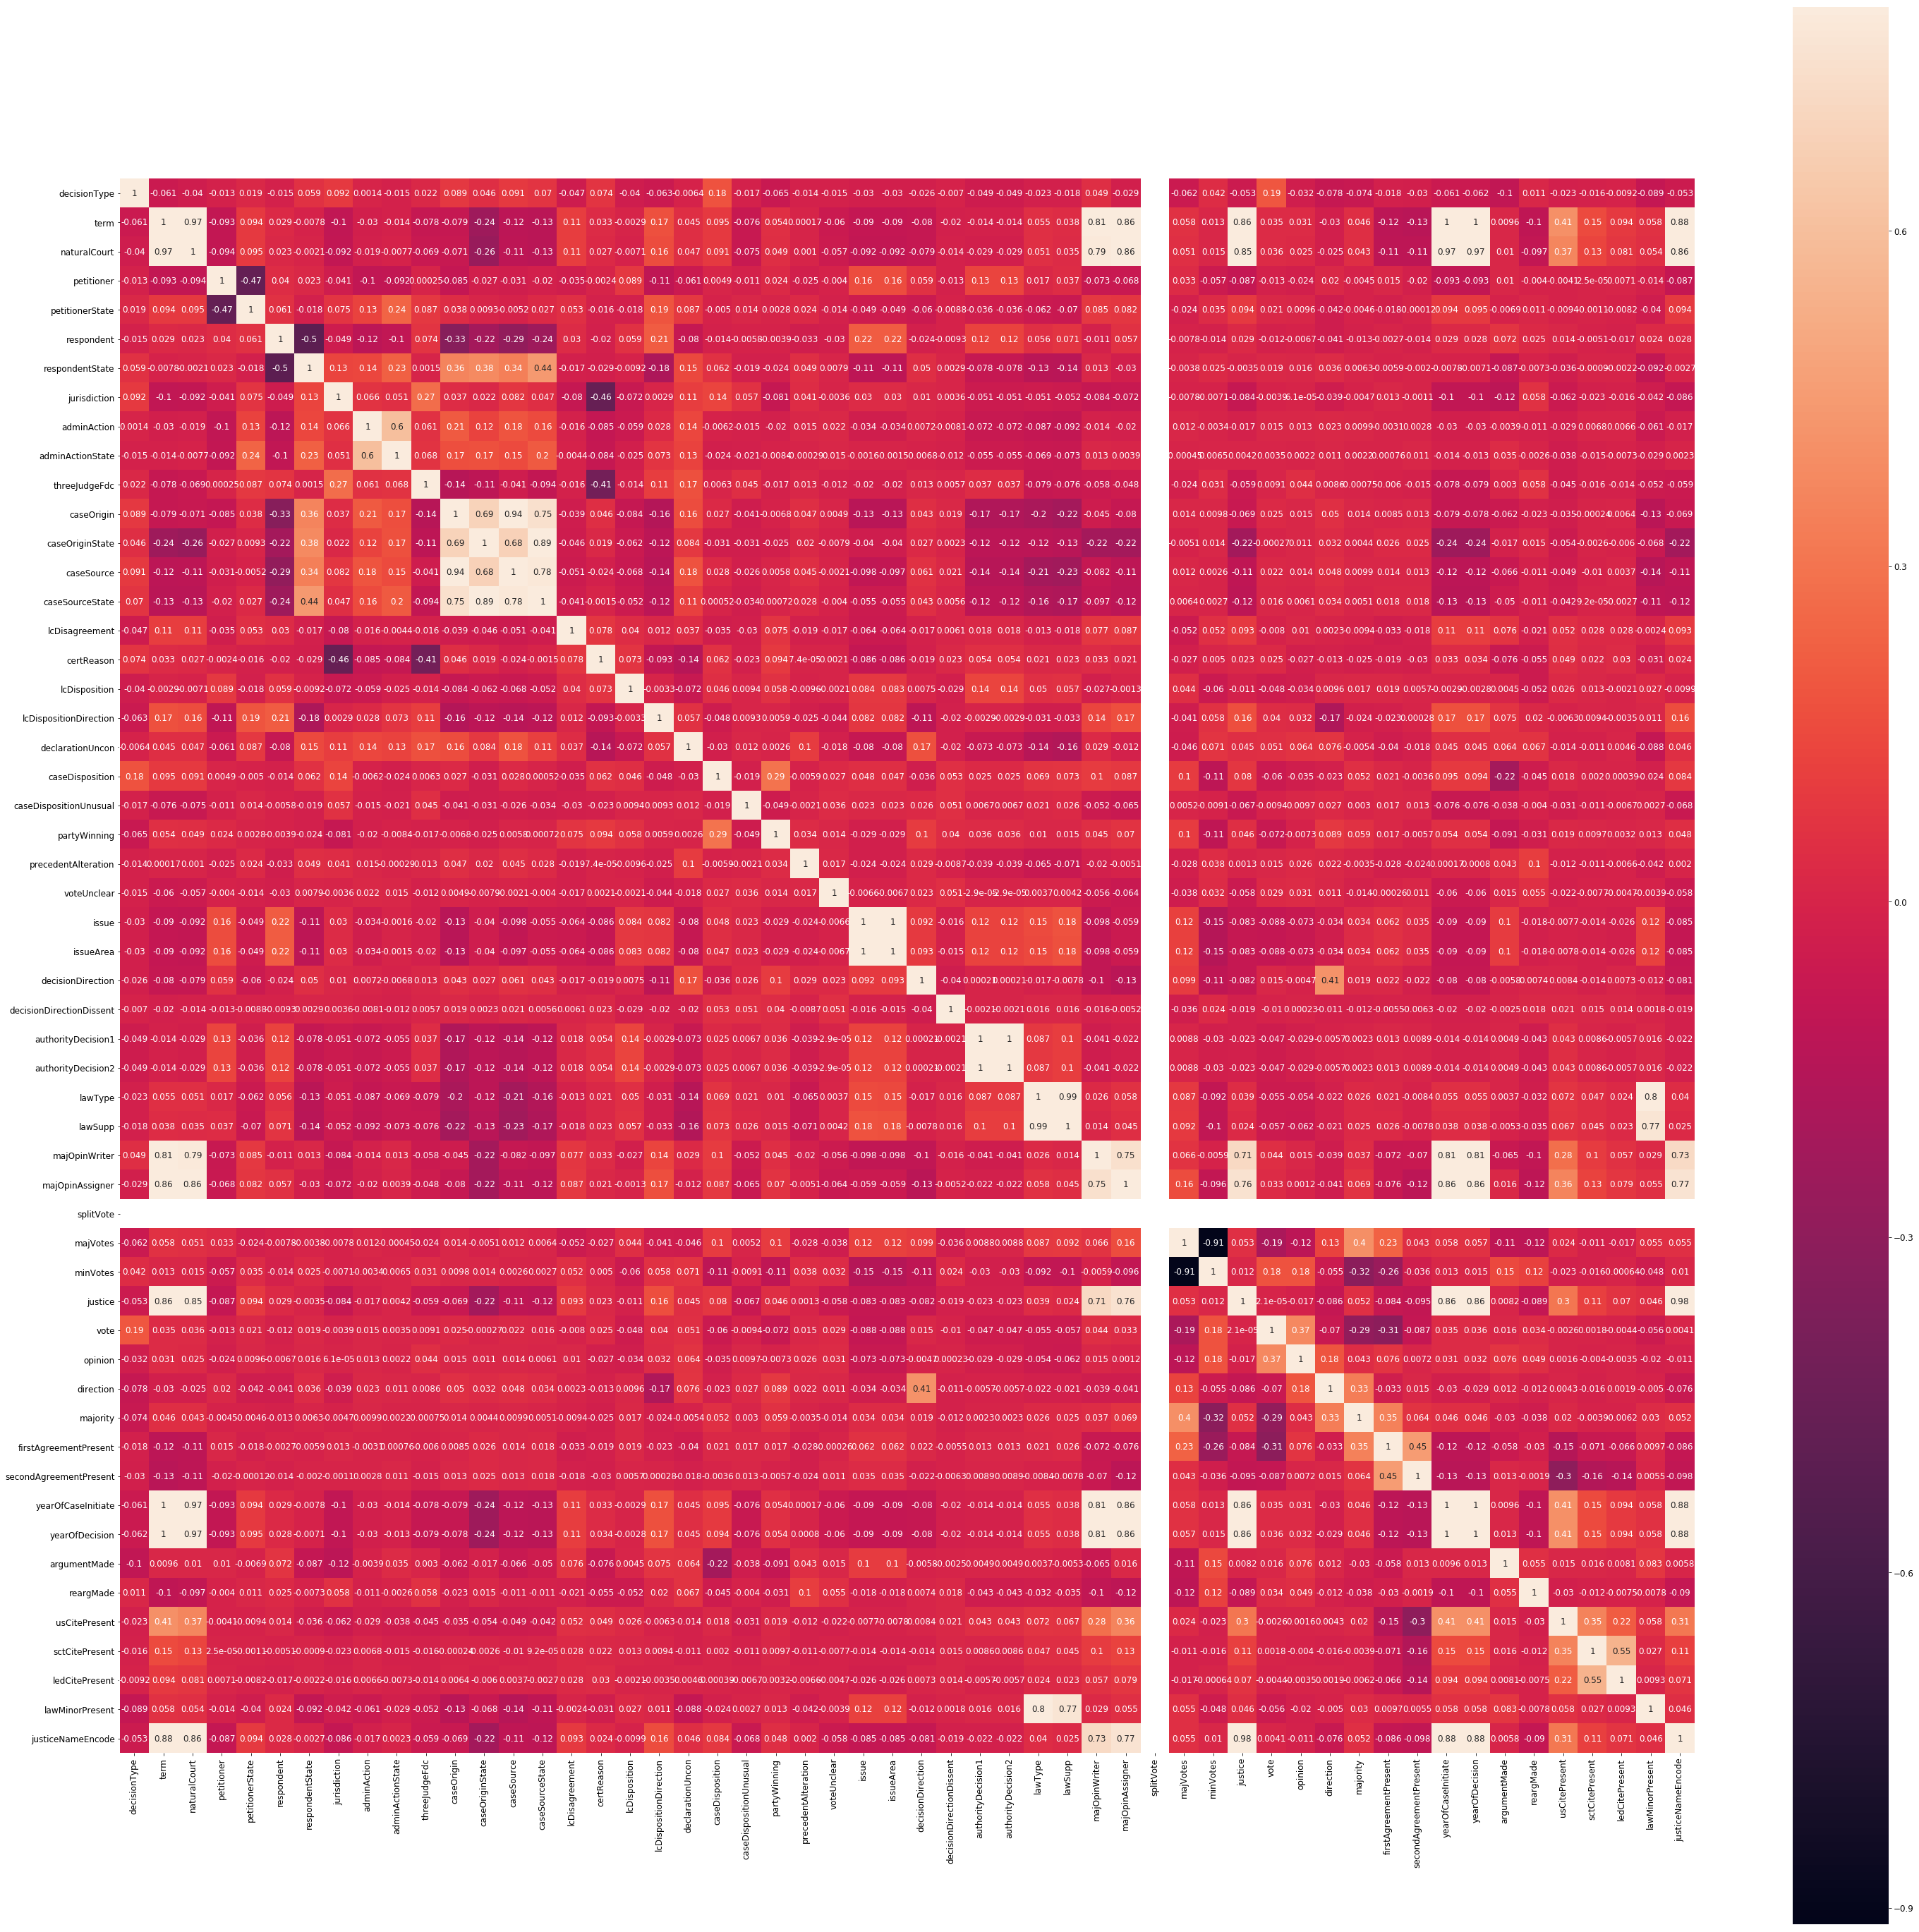

In [95]:
#Corelation Visualization
corrmat_new = numeric_dataset.corr(method='pearson')
f, ax = pyplot.subplots(figsize = (50,50))
sn.heatmap(corrmat_new, vmax=0.8, square=True, annot=True)
pyplot.savefig('OutputCharts/CorelationMatrixAfterTreatment.jpg')

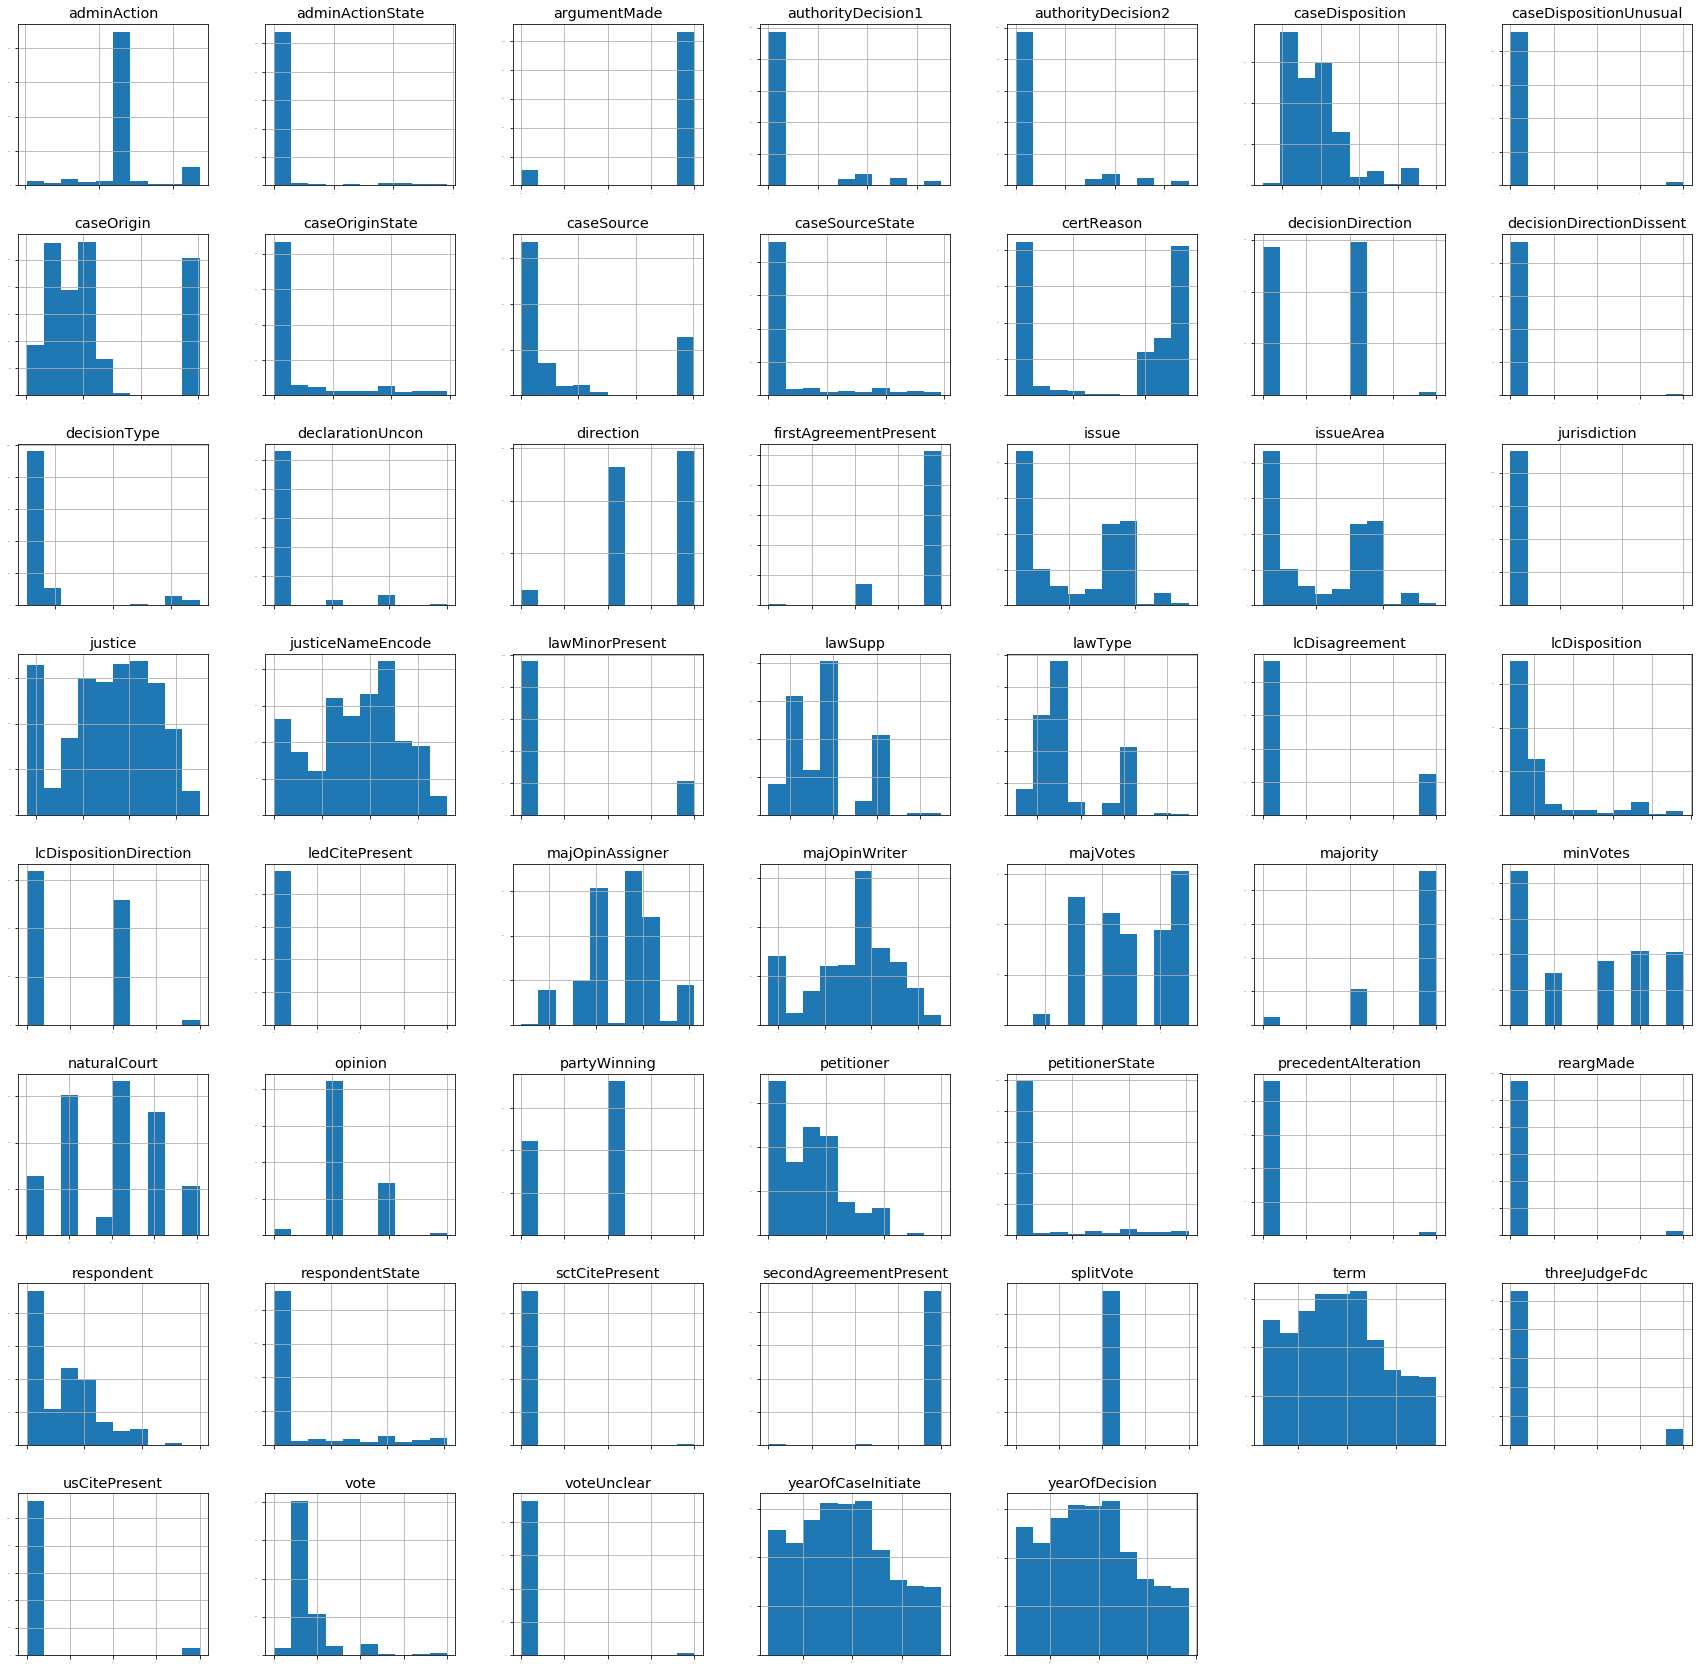

In [96]:
# histograms
numeric_dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1 ,figsize=(30,30))
pyplot.show()
pyplot.savefig('OutputCharts/HistogramsAfterTreatment.jpg')

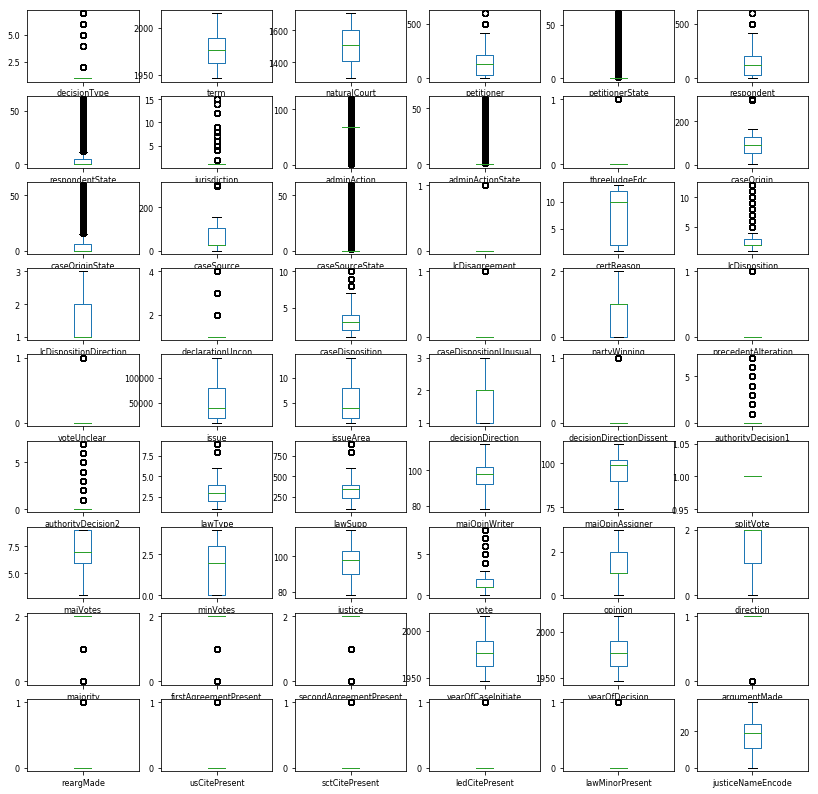

In [97]:
# box and whisker plots
numeric_dataset.plot(kind='box', subplots=True, layout=(9,6), sharex=False, sharey=False, fontsize=8, figsize=(14,14))
pyplot.show()
pyplot.savefig('OutputCharts/BoxPlotsAfterTreatment.jpg')

We would proceed towards model building <b>without any Outlier Treatment</b> as these are categorical variables mostly.

## Test-Train-Val Split

In [98]:
targetColumnList = [
 'decisionType',
 'declarationUncon',
 'caseDisposition',
 'caseDispositionUnusual',
 'partyWinning',
 'precedentAlteration'
]

In [99]:
independentAttributes = ['term',
 'naturalCourt',
 'petitioner',
 'petitionerState',
 'respondent',
 'respondentState',
 'jurisdiction',
 'adminAction',
 'adminActionState',
 'threeJudgeFdc',
 'caseOrigin',
 'caseOriginState',
 'caseSource',
 'caseSourceState',
 'lcDisagreement',
 'certReason',
 'lcDisposition',
 'lcDispositionDirection',
 'voteUnclear',
 'issue',
 'issueArea',
 'decisionDirection',
 'decisionDirectionDissent',
 'authorityDecision1',
 'authorityDecision2',
 'lawType',
 'lawSupp',
 'majOpinWriter',
 'majOpinAssigner',
 'splitVote',
 'majVotes',
 'minVotes',
 'justice',
 'vote',
 'opinion',
 'direction',
 'majority',
 'firstAgreementPresent',
 'secondAgreementPresent',
 'yearOfCaseInitiate',
 'yearOfDecision',
 'argumentMade',
 'reargMade',
 'usCitePresent',
 'sctCitePresent',
 'ledCitePresent',
 'lawMinorPresent',
 'justiceNameEncode']

## caseDisposition Presiction

In [100]:
# create training and testing var for caseDisposition
X = numeric_dataset[independentAttributes].values
Y = numeric_dataset[targetColumnList[2]].values

In [101]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

## Build various models

In [102]:
 #Use this dataframe to store all model performance for various outcome variables.
modelPerfromance = pd.DataFrame(columns = ['Variable_Name', 'Model_Name', 'Train_Accuracy', 'Test_Accuracy', 'RMSE'])

## Decision Tree

In [103]:
DTree  = tree.DecisionTreeClassifier()

In [104]:
graphOutput  = ['OutputCharts/tree_decisionType.dot',
                'OutputCharts/tree_declarationUncon.dot',
                'OutputCharts/tree_caseDisposition.dot',
                'OutputCharts/tree_caseDispositionUnusual.dot',
                'OutputCharts/tree_partyWinning.dot',
                'OutputCharts/tree_precedentAlteration.dot']

In [105]:
for i in range(len(targetColumnList)):
    # create training and testing var for decisionType
    Y = numeric_dataset[targetColumnList[i]].values

    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
    DTree.fit(X_train, y_train)
    tree.export_graphviz(DTree,out_file = graphOutput[i], feature_names = independentAttributes)


## Random Forest

In [106]:
#Create dataframe to hold the importance of features
featureImportance = pd.DataFrame()

In [107]:
rf = RandomForestRegressor()

In [108]:
for i in range(len(targetColumnList)):
    # create training and testing var for decisionType
    Y = numeric_dataset[targetColumnList[i]].values
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
    rf.fit(X_train, y_train)
    print(targetColumnList[i], "Random Forest Train Accuracy :: ", metrics.accuracy_score(y_train, nb.predict(X_train)))
    print(targetColumnList[i], "Random Forest Test Accuracy :: ", metrics.accuracy_score(y_test, nb.predict(X_test)))
    featureImportance = featureImportance.append([targetColumnList[i],sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), independentAttributes),reverse=True)])
    #print("Features sorted by their score:")
    #print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), independentAttributes),reverse=True))

NameError: name 'nb' is not defined

In [ ]:
featureImportance

## Logistic, Multinomial Logistic, Multinomial Naive Bayes and Gaussian Naive Bayes

In [ ]:
for i in range(len(targetColumnList)):
    # create training and testing var for decisionType
    Y = numeric_dataset[targetColumnList[i]].values

    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
    
    # Train multinomial logistic regression model
    mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)
    print(targetColumnList[i], "Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, lr.predict(X_train)))
    print(targetColumnList[i], "Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, lr.predict(X_test)))
        
    print(targetColumnList[i], "Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mul_lr.predict(X_train)))
    print(targetColumnList[i], "Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, mul_lr.predict(X_test)))
    
    #Multinomial Naive Byaes Model
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    print(targetColumnList[i], "Multinomial Naive Bayes Train Accuracy :: ", metrics.accuracy_score(y_train, nb.predict(X_train)))
    print(targetColumnList[i], "Multinomial Naive Bayes Test Accuracy :: ", metrics.accuracy_score(y_test, nb.predict(X_test)))
    
    #Gaussian Naive Byaes Model
    nb_Gauss = GaussianNB()
    nb_Gauss.fit(X_train, y_train)
    print(targetColumnList[i], "Gaussain Naive Bayes Train Accuracy :: ", metrics.accuracy_score(y_train, nb_Gauss.predict(X_train)))
    print(targetColumnList[i], "Gaussian Naive Bayes Test Accuracy :: ", metrics.accuracy_score(y_test, nb_Gauss.predict(X_test)))

# PCA

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_PCA = scaler.transform(X_train)
X_test_PCA = scaler.transform(X_test)

In [ ]:
pca.fit(X_train_PCA)

In [ ]:
print("Number of components chosen by PCA: ", pca.n_components_ )

In [ ]:
X_train_PCA = pca.transform(X_train_PCA)
X_test_PCA = pca.transform(X_test_PCA)

In [ ]:
# Build the first multi regression model
# Train multi-classification model with logistic regression
lr_PCA = linear_model.LogisticRegression()
lr_PCA.fit(X_train_PCA, y_train)
 
# Train multinomial logistic regression model
mul_lr_PCA = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
mul_lr_PCA.fit(X_train_PCA, y_train)

#nb_PCA = MultinomialNB()
#nb_PCA.fit(X_train_PCA, y_train)

#print("Multinomial Naive Bayes Train Accuracy :: ", metrics.accuracy_score(y_train, nb_PCA.predict(X_train_PCA)))
#print("Multinomial Naive Bayes Test Accuracy :: ", metrics.accuracy_score(y_test, nb_PCA.predict(X_test_PCA)))
    
print("Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, lr_PCA.predict(X_train_PCA)))
print("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, lr_PCA.predict(X_test_PCA)))
    
print("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mul_lr_PCA.predict(X_train_PCA)))
print("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, mul_lr_PCA.predict(X_test_PCA)))

In [ ]:
nb_Gauss_PCA = GaussianNB()
nb_Gauss_PCA.fit(X_train_PCA, y_train)

print("Multinomial Naive Bayes Train Accuracy :: ", metrics.accuracy_score(y_train, nb_Gauss_PCA.predict(X_train_PCA)))
print("Multinomial Naive Bayes Test Accuracy :: ", metrics.accuracy_score(y_test, nb_Gauss_PCA.predict(X_test_PCA)))   

In [ ]:
for i in range(len(targetColumnList)):
    
    Y = numeric_dataset[targetColumnList[i]].values
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
    # Fit on training set only.
    scaler.fit(X_train)
    # Apply transform to both the training set and the test set.
    X_train_PCA = scaler.transform(X_train)
    X_test_PCA = scaler.transform(X_test) 
    pca.fit(X_train_PCA)
    X_train_PCA = pca.transform(X_train_PCA)
    X_test_PCA = pca.transform(X_test_PCA)    
    
    # Build the first multi regression model
    # Train multi-classification model with logistic regression
    lr_PCA = linear_model.LogisticRegression()
    lr_PCA.fit(X_train_PCA, y_train)
     
    # Train multinomial logistic regression model
    mul_lr_PCA = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
    mul_lr_PCA.fit(X_train_PCA, y_train)
        
    print(targetColumnList[i], "Logistic regression Train Accuracy after PCA :: ", metrics.accuracy_score(y_train, lr_PCA.predict(X_train_PCA)))
    print(targetColumnList[i], "Logistic regression Test Accuracy after PCA :: ", metrics.accuracy_score(y_test, lr_PCA.predict(X_test_PCA)))
        
    print(targetColumnList[i], "Multinomial Logistic regression Train Accuracy after PCA :: ", metrics.accuracy_score(y_train, mul_lr_PCA.predict(X_train_PCA)))
    print(targetColumnList[i], "Multinomial Logistic regression Test Accuracy after PCA:: ", metrics.accuracy_score(y_test, mul_lr_PCA.predict(X_test_PCA)))
    
    nb_Gauss_PCA = GaussianNB()
    nb_Gauss_PCA.fit(X_train_PCA, y_train)
    
    print(targetColumnList[i], "Gaussian Naive Bayes Train Accuracy after PCA :: ", metrics.accuracy_score(y_train, nb_Gauss_PCA.predict(X_train_PCA)))
    print(targetColumnList[i], "Gaussian Naive Bayes Test Accuracy after PCA:: ", metrics.accuracy_score(y_test, nb_Gauss_PCA.predict(X_test_PCA))) 

## Predict values with the most accurate model (PCA with multinomial logistic regression)

In [ ]:
predictList = []
Y_Test_List =[]
for i in range(len(targetColumnList)):
    Y = numeric_dataset[targetColumnList[i]].values
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
    # Fit on training set only.
    scaler.fit(X_train)
    # Apply transform to both the training set and the test set.
    X_train_PCA = scaler.transform(X_train)
    X_test_PCA = scaler.transform(X_test) 
    pca.fit(X_train_PCA)
    X_train_PCA = pca.transform(X_train_PCA)
    X_test_PCA = pca.transform(X_test_PCA)
    # Train multinomial logistic regression model
    mul_lr_PCA = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
    mul_lr_PCA.fit(X_train_PCA, y_train) 
    Y_predict = mul_lr_PCA.predict(X_test_PCA)
    predictList.append(Y_predict)
    Y_Test_List.append(y_test)

In [ ]:
predictList

In [ ]:
Y_Test_List

In [ ]:
predicted_DF = pd.DataFrame()

In [ ]:
predicted_DF[0] = Y_Test_List[0]
predicted_DF[1] = predictList[0]
predicted_DF[2] = Y_Test_List[1]
predicted_DF[3] = predictList[1]
predicted_DF[4] = Y_Test_List[2]
predicted_DF[5] = predictList[2]
predicted_DF[6] = Y_Test_List[3]
predicted_DF[7] = predictList[3]
predicted_DF[8] = Y_Test_List[4]
predicted_DF[9] = predictList[4]
predicted_DF[10] = Y_Test_List[5]
predicted_DF[11] = predictList[5]

In [ ]:
FinalColumnList = [
 'decisionType',
 'decisionType_predicted',
 'declarationUncon',
 'declarationUncon_predicted',
 'caseDisposition',
 'caseDisposition_predicted',
 'caseDispositionUnusual',
 'caseDispositionUnusual_predicted',
 'partyWinning',
 'partyWinning_predicted',
 'precedentAlteration',
 'precedentAlteration_predicted'
]

In [ ]:
predicted_DF.columns = FinalColumnList

In [ ]:
predicted_DF.head()

In [ ]:
predicted_DF.to_csv('OutputExcels/Predicted_Values.csv', sep=',', encoding='utf-8')